In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [8]:
warnings.filterwarnings("ignore")

In [9]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

In [10]:
_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])


id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

In [11]:
irrel = [
    'automoderator',        '[deleted]',            'HCE_Replacement_Bot',  'Rangers_Bot', 
    'dropbox_bot',          'Website_Mirror_Bot',   'Metric_System_Bot',    'Fedora-Tip-Bot',
    'some_bot',             'Brigade_Bot',          'Link_Correction_Bot',  'Porygon-Bot',
    'karmaconspiracy_Bot',  'SWTOR_Helper_Bot',     'annoying_yes_bot',     'Antiracism_Bot',
    'qznc_bot',             'mma_gif_bot',          'QUICHE-BOT',           'bRMT_Bot',
    'hockey_gif_bot',       'nba_gif_bot',          'gifster_bot',          'imirror_bot',
    'okc_rating_bot',       'tennis_gif_bot',       'nfl_gif_bot',          'CPTModBot',
    'LocationBot',          'CreepySmileBot',       'FriendSafariBot',      'WritingPromptsBot',
    'CreepierSmileBot',     'Cakeday-Bot',          'Meta_Bot',             'soccer_gif_bot',
    'gunners_gif_bot',      'xkcd_number_bot',      'PokemonFlairBot',      'ChristianityBot',
    'cRedditBot',           'StreetFightMirrorBot', 'FedoraTipAutoBot',     'UnobtaniumTipBot',
    'astro-bot',            'TipMoonBot',           'PlaylisterBot',        'Wiki_Bot',
    'fedora_tip_bot',       'GunnersGifsBot',       'PGN-Bot',              'GunnitBot',
    'havoc_bot',            'Relevant_News_Bot',    'gfy_bot',              'RealtechPostBot',
    'imgurHostBot',         'Gatherer_bot',         'JumpToBot',            'DeltaBot',
    'Nazeem_Bot',           'PhoenixBot',           'AtheismModBot',        'IsItDownBot',
    'RFootballBot',         'KSPortBot',            'CompileBot',           'SakuraiBot',
    'asmrspambot',          'SurveyOfRedditBot',    'rule_bot',             'xkcdcomic_bot',
    'PloungeMafiaVoteBot',  'PoliticBot',           'Dickish_Bot_Bot',      'SuchModBot',
    'MultiFunctionBot',     'CasualMetricBot',      'xkcd_bot',             'VerseBot',
    'BeetusBot',            'GameDealsBot',         'BadLinguisticsBot',    'rhiever-bot',
    'gfycat-bot-sucksdick', 'chromabot',            'Readdit_Bot',          'disapprovalbot',
    'request_bot',          'define_bot',           'dogetipbot',           'techobot',
    'CaptionBot',           'rightsbot',            'colorcodebot',         'roger_bot',
    'ADHDbot',              'hearing-aid_bot',      'WikipediaCitationBot', 'PonyTipBot',
    'fact_check_bot',       'rusetipbot',           'classybot',            'NFLVideoBot',
    'MAGNIFIER_BOT',        'WordCloudBot2',        'JotBot',               'WeeaBot',
    'raddit-bot',           'tipmoonbot2',          'haiku_robot',          'ttumblrbots',
    'givesafuckbot',        'gabentipbot',          'serendipitybot',       'autowikibot',
    'topredditbot',         'ddlbot',               'bitofnewsbot',         'conspirobot',
    'bot',                  'Definition_Bot',       'redditbots',           'autourbanbot',
    'randnumbot',           'VideoLinkBot',         'transcribot',          'vertpornpostbot',
    'vpbot14',              'verticalgifbot',       'animemod',             'nfl_mod',
    'groupbot',             'jobautomator',         'cricketmatchbot',      'ukpolbot',
    'politicsmoderatorbot', 'usi-bot',              'fplmoderator',         'commentorofposts',
    'nba_mod',              '2soccer2bot',          'ffbot',                'wishlistbot',
    'bodybuildingbot',      'latherbot',            'kickopenthedoorbot',   'fantasymod',
    'steroidsbot',          'darnbot',              'cfb_referee',          'cbbbot',
    'sbpotdbot',            'twitterinfo_bot',      'nfcaaofficialrefbot',  'rlcd-bot',
    'hw2-bot',              'hwsbot',               'feetpicsbot',          'nfl_gamethread',
    'cursedrobot',          'sexstatsbot',          'judgement_bot_aita',   'repostsleuthbot',
    'savevideo',            'mytoppost',            'transcribersofreddit', 'keepingdankmemesdank',
    'virtualautumn',        'muchmuchkarma',        'gdt_bot',              'nfl_gdt_bot',
    'rnews_mod',            'goodbotautomod',
    ]

irrel = [i.lower() for i in irrel]

In [12]:
def subtlie(sub):
    sub_mask = trimmed_df['Subreddit'] == sub
    sub_auths[sub] = trimmed_df[sub_mask]['Source'].append(trimmed_df[sub_mask]['Target']).unique()
    sub_size[sub] = sub_size.get(sub, []) + [len(sub_auths[sub])]
    sub_posts[sub] = sub_posts.get(sub, []) + [trimmed_df[sub_mask]['Count'].sum()]
    source_mask = trimmed_df['Source'].isin(sub_auths[sub])
    target_mask = trimmed_df['Target'].isin(sub_auths[sub])
    total_links = trimmed_df[source_mask | target_mask]['Count'].sum()
    sub_mask2 = trimmed_df[source_mask | target_mask]['Subreddit'] == sub
    internal_links = trimmed_df[source_mask | target_mask][sub_mask2]['Count'].sum()
    sub_i[sub] = sub_i.get(sub, []) + [internal_links]
    external_links = total_links - internal_links
    sub_e[sub] = sub_e.get(sub, []) + [external_links]
    sub_ei[sub] = sub_ei.get(sub, []) + [(external_links - internal_links) / total_links]
    return sub_ei[sub]

sub_auths = {}
sub_size = {}
sub_posts = {}
sub_i = {}
sub_e = {}
sub_ei = {}

for date in _center_dates:
    df = pd.read_pickle((id_l + date + ('/EDGE_LIST_RAW_{}_{}.pkl'.format(9,45))))
    source_mask = df['Source'].isin(irrel)
    target_mask = df['Target'].isin(irrel)
    trimmed_df = df[(~source_mask) & (~target_mask)]
    
    subtlie('conspiracy')
    subtlie('worldnews')
    subtlie('news')
    subtlie('worldpolitics')
    subtlie('worldevents')
    subtlie('business')
    subtlie('economics')
    subtlie('law')
    subtlie('government')
    subtlie('history')
    subtlie('politics')
    subtlie('politics2')
    subtlie('americanpolitics')
    subtlie('ukpolitics')
    subtlie('socialism')
    subtlie('conservative')
    subtlie('anarchism')
    subtlie('progressive')
    subtlie('liberal')
    subtlie('conservatives')
    subtlie('republicanism')
    subtlie('anarchist')
    subtlie('marxism')
    subtlie('objectivism')
    subtlie('communist')
    subtlie('libertarian')
    subtlie('egalitarianism')
    subtlie('freethought')
    subtlie('stateoftheunion')
    subtlie('politicaldiscussion')
    subtlie('politicalhumor')
    subtlie('culture')
    subtlie('corruption')
    subtlie('propaganda')
    subtlie('debate')
    subtlie('votingtheory')
    subtlie('racism')
    subtlie('moderatepolitics')
    subtlie('foodforthought')
    subtlie('democrats')
    subtlie('intelligence')
    subtlie('campaigns')
    subtlie('privacy')
    subtlie('collapse')
    subtlie('activism')
    subtlie('electionreform')
    subtlie('republican')

In [13]:
ei_data = pd.DataFrame(sub_ei, index=_center_dates)
e_data = pd.DataFrame(sub_e, index=_center_dates)
i_data = pd.DataFrame(sub_i, index=_center_dates)
size_data = pd.DataFrame(sub_size, index=_center_dates) 
post_data = pd.DataFrame(sub_posts, index=_center_dates)

In [14]:
num1 = 9
num2 = 45

ei_data.to_pickle((id_l + date + ('/SUBALITK_EI_DATA_{}_{}.pkl'.format(num1,num2))))
e_data.to_pickle((id_l + date + ('/SUBALITK_E_DATA_{}_{}.pkl'.format(num1,num2))))
i_data.to_pickle((id_l + date + ('/SUBALITK_I_DATA_{}_{}.pkl'.format(num1,num2))))
size_data.to_pickle((id_l + date + ('/SUBALITK_SIZE_DATA_{}_{}.pkl'.format(num1,num2))))
post_data.to_pickle((id_l + date + ('/SUBALITK_POST_DATA_{}_{}.pkl'.format(num1,num2))))

In [15]:
subbert = [
    'conspiracy',
    'worldnews',
    'news',
    'worldpolitics',
    # 'worldevents',
    # 'business',
    'economics',
    # 'law',
    # 'government',
    # 'history',
    'politics',
    # 'politics2',
    # 'americanpolitics',
    'ukpolitics',
    # 'socialism',
    'conservative',
    # 'anarchism',
    # 'progressive',
    # 'liberal',
    # 'conservatives',
    # 'republicanism',
    # 'anarchist',
    # 'marxism',
    # 'objectivism',
    # 'communist',
    'libertarian',
    # 'egalitarianism',
    # 'freethought',
    # 'stateoftheunion',
    'politicaldiscussion',
    'politicalhumor',
    # 'culture',
    # 'corruption',
    # 'propaganda',
    # 'debate',
    # 'votingtheory',
    # 'racism',
    'moderatepolitics',
    # 'foodforthought',
    # 'democrats',
    # 'intelligence',
    # 'campaigns',
    'privacy',
    'collapse',
    # 'activism',
    # 'electionreform',
    # 'republican'
    ]

In [16]:
ei_data[subbert]

conspiracy  worldnews      news  worldpolitics  economics  \
2020-10-04   -0.369281   0.197800  0.134117      -0.422325   0.558569   
2020-10-05   -0.336437   0.238291  0.152392      -0.445910   0.554125   
2020-10-06   -0.417644   0.260081  0.218109      -0.393787   0.673403   
2020-10-07   -0.415219   0.246801  0.185388      -0.361775   0.648964   
2020-10-08   -0.395861   0.243440  0.180614      -0.371160   0.696720   
2020-10-09   -0.332444   0.226410  0.177919      -0.455455   0.716935   
2020-10-10   -0.286645   0.188628  0.245936      -0.477872   0.747268   
2020-10-11   -0.308925   0.185240  0.231063      -0.349699   0.733244   
2020-10-12   -0.270903   0.222303  0.227065      -0.251123   0.705688   
2020-10-13   -0.264083   0.224381  0.198949      -0.164254   0.668327   
2020-10-14   -0.293671   0.202324  0.162093      -0.188785   0.642973   
2020-10-15   -0.299886   0.183240  0.176319      -0.076823   0.591449   
2020-10-16   -0.337580   0.174942  0.163834      -0.032502   0.305228   
2020-10-17   -0.337812   0.219235  0.159091      -0.300426   0.434766   
2020-10-18   -0.424756   0.178389  0.100674      -0.308200   0.533664   
2020-10-19   -0.411914   0.144140  0.089880      -0.160544   0.723713   
2020-10-20   -0.369014   0.148388  0.136711      -0.265964   0.778991   
2020-10-21   -0.342340   0.146063  0.147676      -0.156821   0.595334   
2020-10-22   -0.346969   0.133918  0.105080      -0.179049   0.703965   
2020-10-23   -0.397987   0.139905  0.095893      -0.156916   0.884701   
2020-10-24   -0.452635   0.148218  0.086120       0.144094   0.887330   
2020-10-25   -0.446456   0.144946  0.120197       0.118350   0.883244   
2020-10-26   -0.418390   0.095653  0.122207       0.048886   0.790189   
2020-10-27   -0.385963   0.101495  0.095868       0.311390   0.723665   
2020-10-28   -0.364575   0.134896  0.090657       0.271429   0.712717   
2020-10-29   -0.343602   0.141318  0.146041       0.224383   0.724417   
2020-10-30   -0.331467   0.140593  0.151237       0.151213   0.690115   
2020-10-31   -0.275826   0.124425  0.155241       0.089344   0.647422   
2020-11-01   -0.254326   0.152622  0.173782       0.006595   0.399323   
2020-11-02   -0.247295   0.204873  0.128773       0.006124   0.418747   
2020-11-03   -0.274234   0.170357  0.171646      -0.211205   0.562852   
2020-11-04   -0.299995   0.285644  0.125650      -0.142109   0.447302   
2020-11-05   -0.495410   0.346617  0.115007      -0.076393   0.485778   
2020-11-06   -0.406592   0.211324  0.131124      -0.069086   0.601476   
2020-11-07   -0.544666   0.167644  0.109535      -0.097368   0.630132   
2020-11-08   -0.541879   0.250636  0.142993      -0.149064   0.514196   
2020-11-09   -0.581277   0.222581  0.138189      -0.109780   0.531883   
2020-11-10   -0.571747   0.185343  0.126300      -0.125100   0.479074   
2020-11-11   -0.582693   0.129493  0.143801      -0.165438   0.548768   
2020-11-12   -0.567569   0.158979  0.116983      -0.097893   0.548225   
2020-11-13   -0.436350   0.160808  0.163870      -0.099305   0.457560   
2020-11-14   -0.391204   0.172386  0.245211      -0.130512   0.503741   
2020-11-15   -0.346010   0.157619  0.261035      -0.239190   0.648226   
2020-11-16   -0.313699   0.214401  0.285402      -0.292002   0.711844   
2020-11-17   -0.270554   0.164739  0.232844      -0.295302   0.724894   
2020-11-18   -0.342983   0.178500  0.235589      -0.268089   0.774623   
2020-11-19   -0.361254   0.173933  0.251691      -0.273333   0.686383   
2020-11-20   -0.379757   0.145946  0.239872      -0.200414   0.654950   
2020-11-21   -0.361007   0.107451  0.228158      -0.233696   0.677575   
2020-11-22   -0.374727   0.125013  0.242338      -0.356653   0.620758   
2020-11-23   -0.399829   0.099625  0.301944      -0.256281   0.686747   
2020-11-24   -0.395372   0.123547  0.290022      -0.135989   0.725000   
2020-11-25   -0.423181   0.138580  0.232758       0.027795   0.512354   
2020-11-26   -0.433548   0.133046  0.242546       0.118199   0.570248 

<AxesSubplot:>

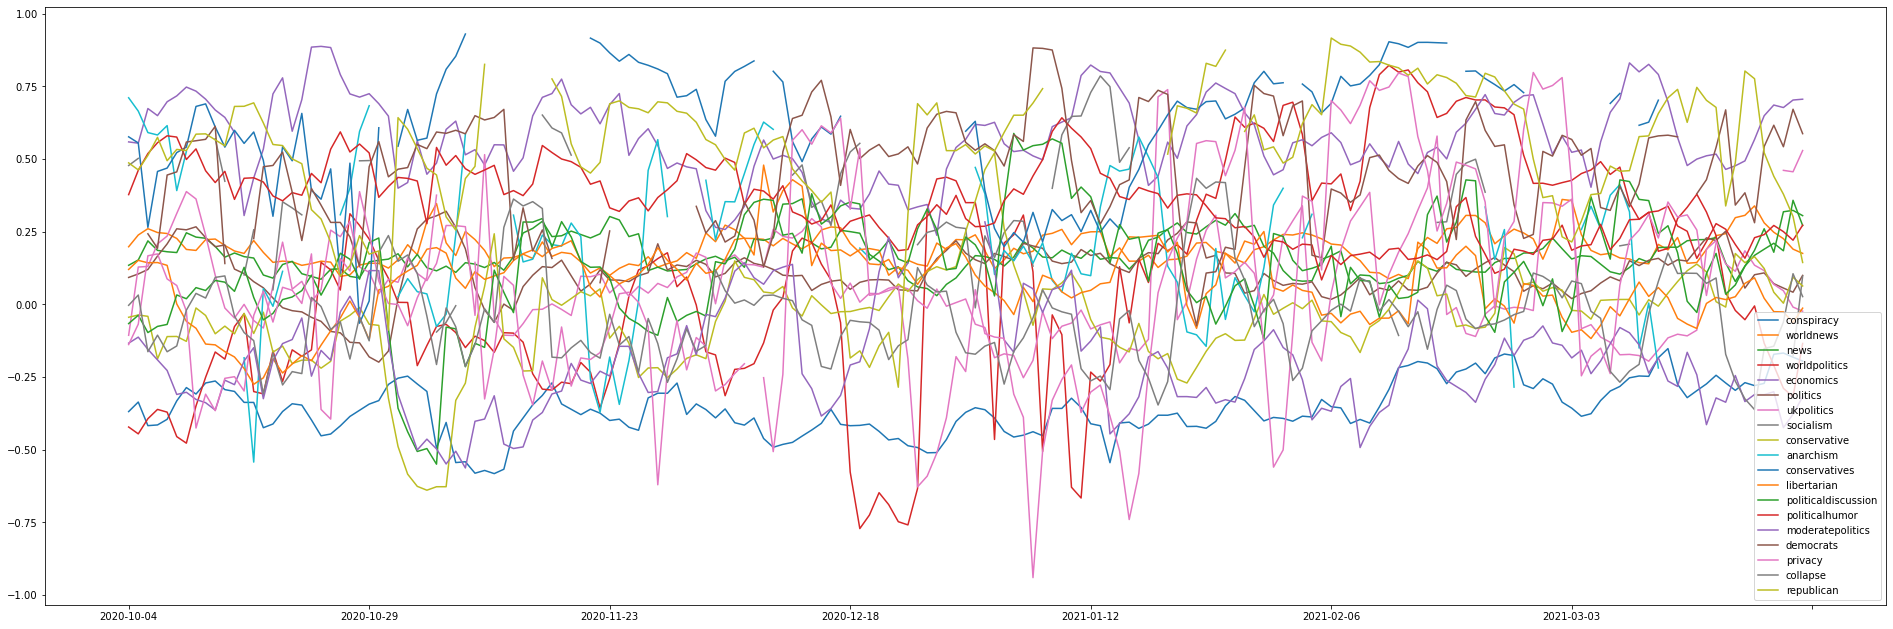

In [17]:
ei_data[subbert].plot(figsize=(33,11))

In [18]:
plt.style.use('dark_background')

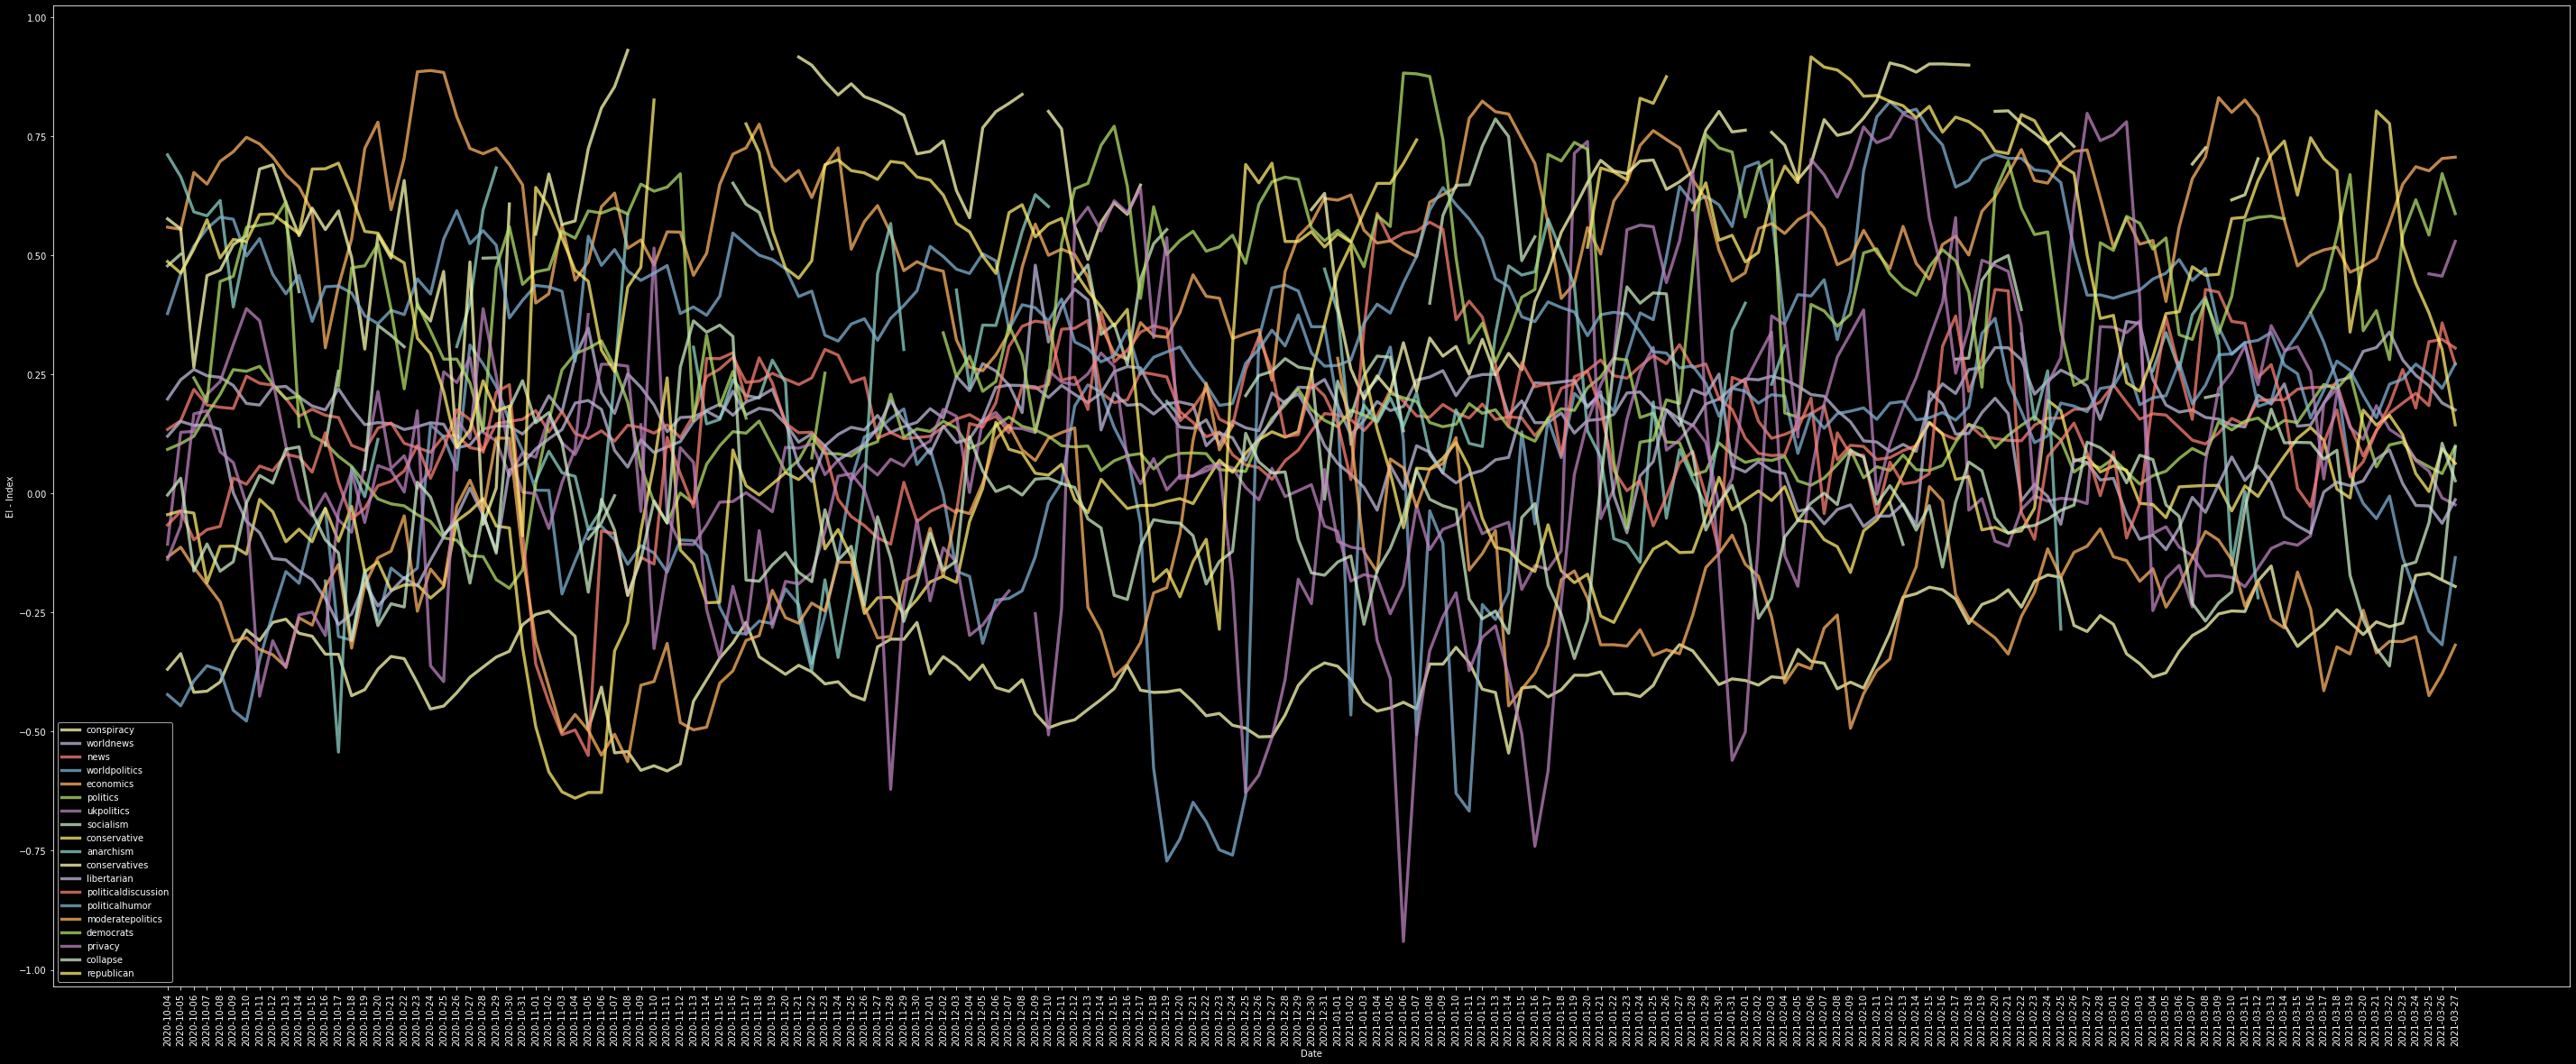

In [19]:
fig = plt.figure(figsize=(50,20))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
for sub in ei_data[subbert].columns:
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, alpha=0.75, label=sub)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('EI - Index')
plt.legend()

conspiracy election imporntance : -0.4011549788819971
conspiracy insurrection imporntance : 0.7030652391765365
worldnews election imporntance : -0.36857912211806365
worldnews insurrection imporntance : -0.22378392559283927
news election imporntance : 0.43037842950448396
news insurrection imporntance : -0.04323055798591456
worldpolitics election imporntance : 0.3695103953300462
worldpolitics insurrection imporntance : 0.1390272931114264
economics election imporntance : 0.4680503190366731
economics insurrection imporntance : 0.1696131539007316
politics election imporntance : -0.7228608265604336
politics insurrection imporntance : -0.7544584775865782
ukpolitics election imporntance : -0.3263624558359301
ukpolitics insurrection imporntance : 1.2819954843636678
socialism election imporntance : 1.843003875013042
socialism insurrection imporntance : 0.05649692580731932
conservative election imporntance : 3.0739646076921407
conservative insurrection imporntance : -0.716846807688894
anarchism e

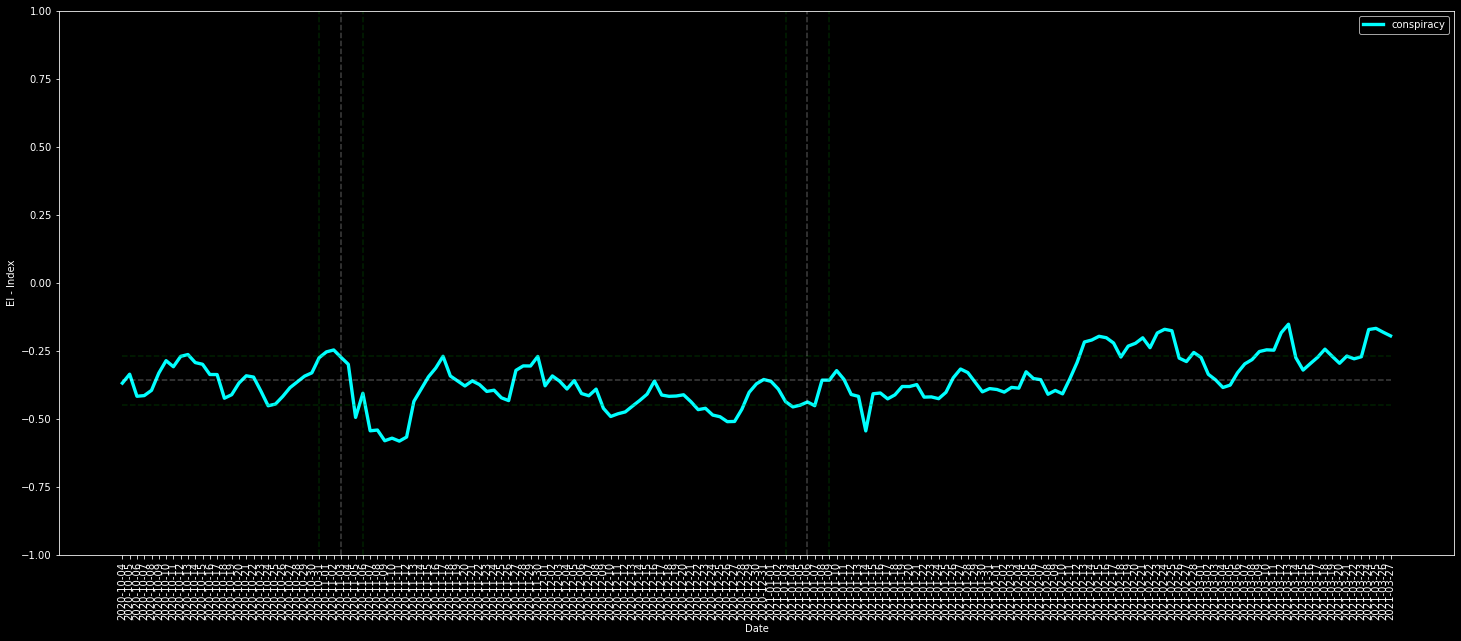

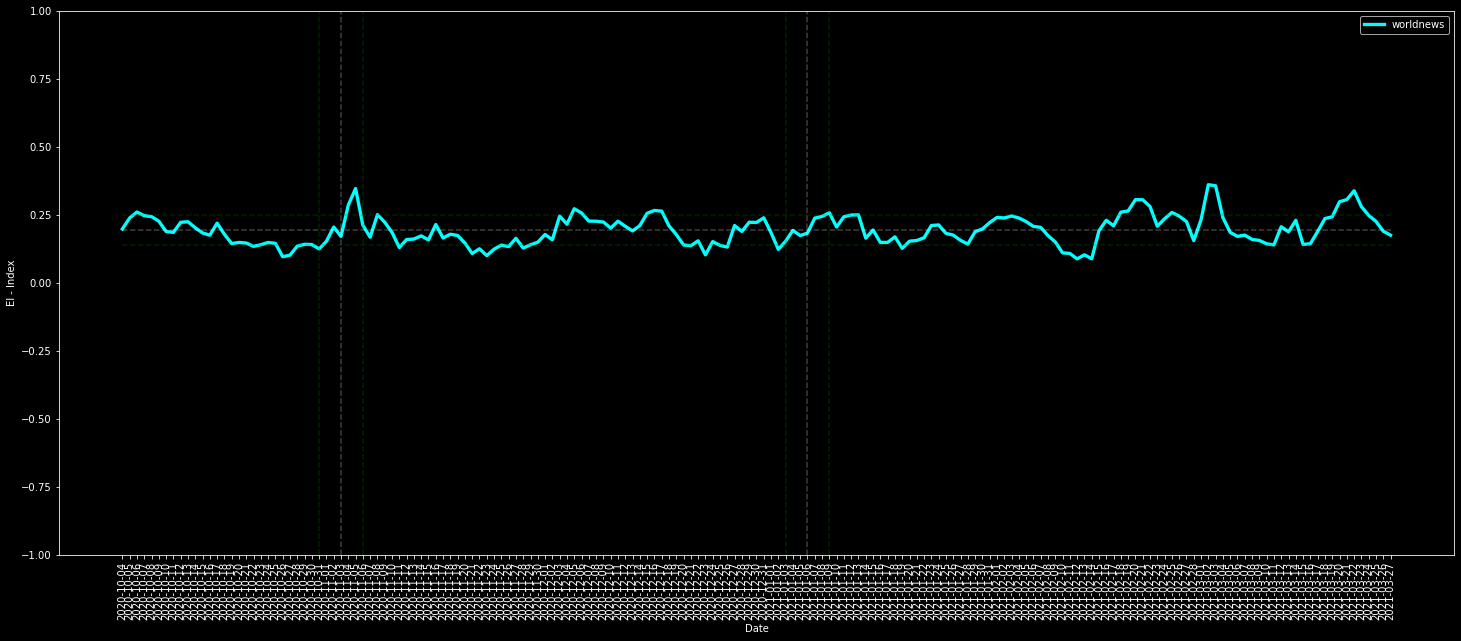

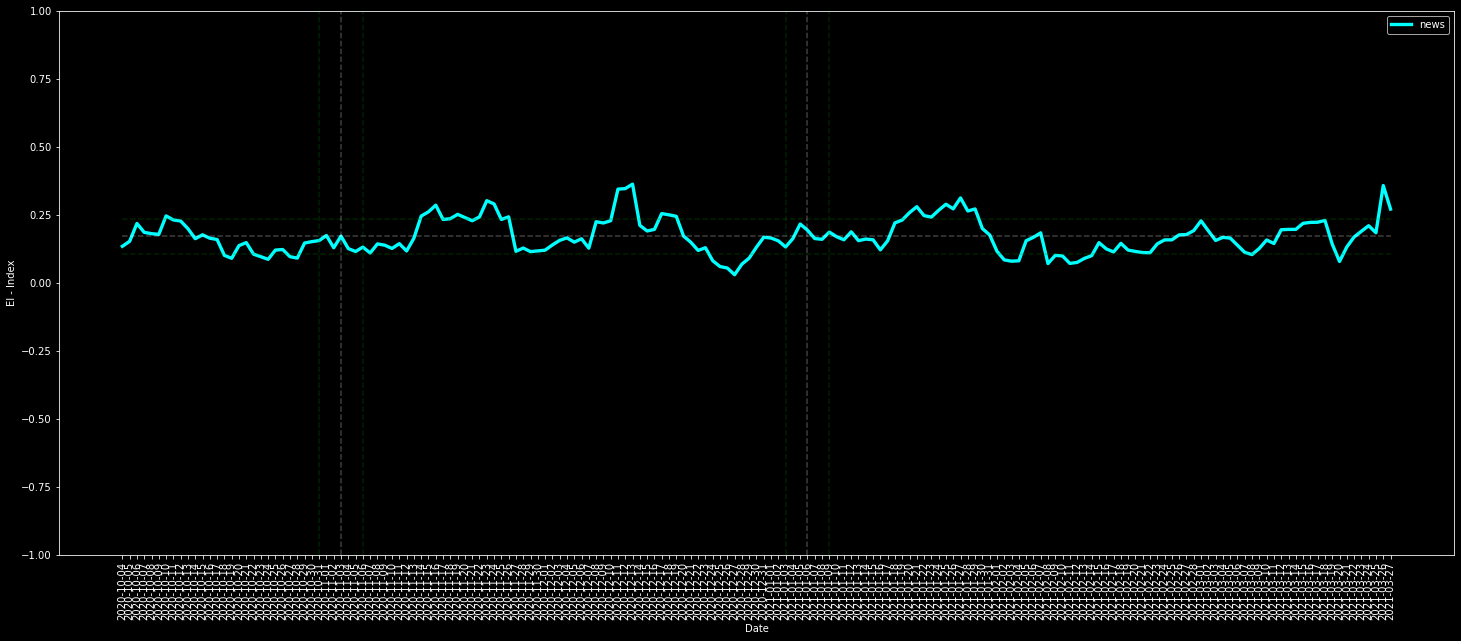

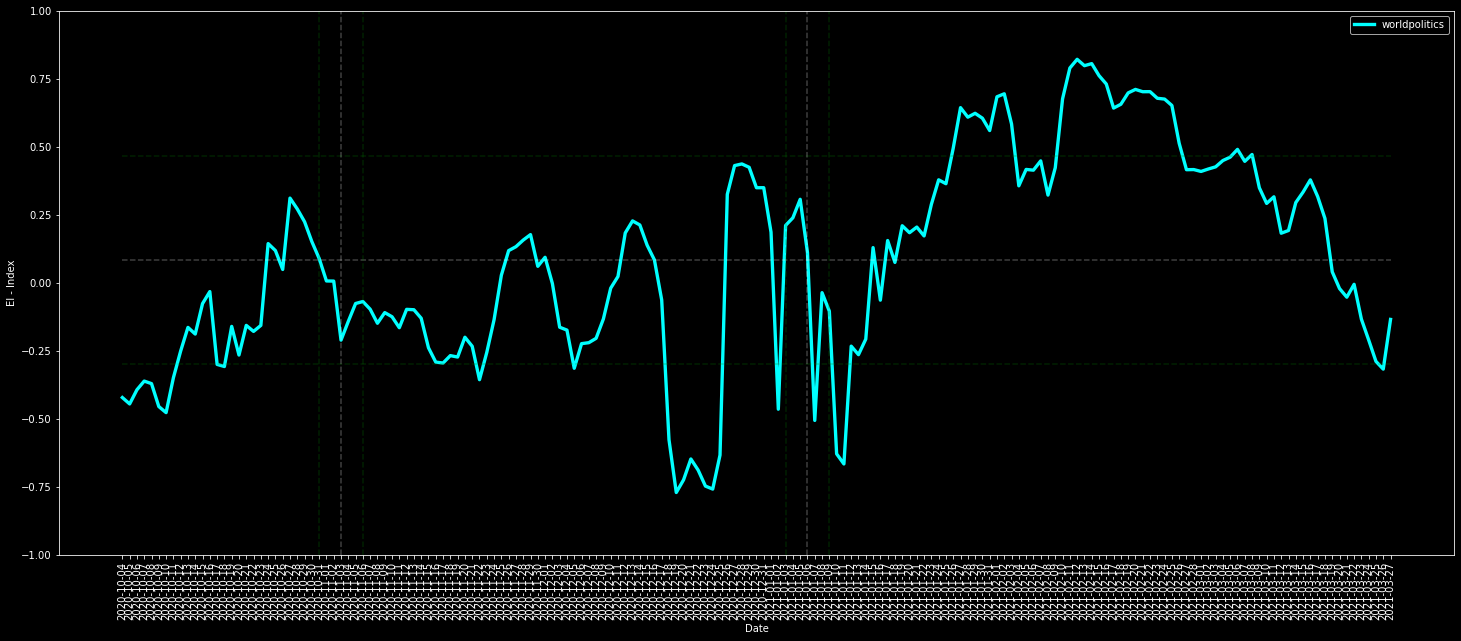

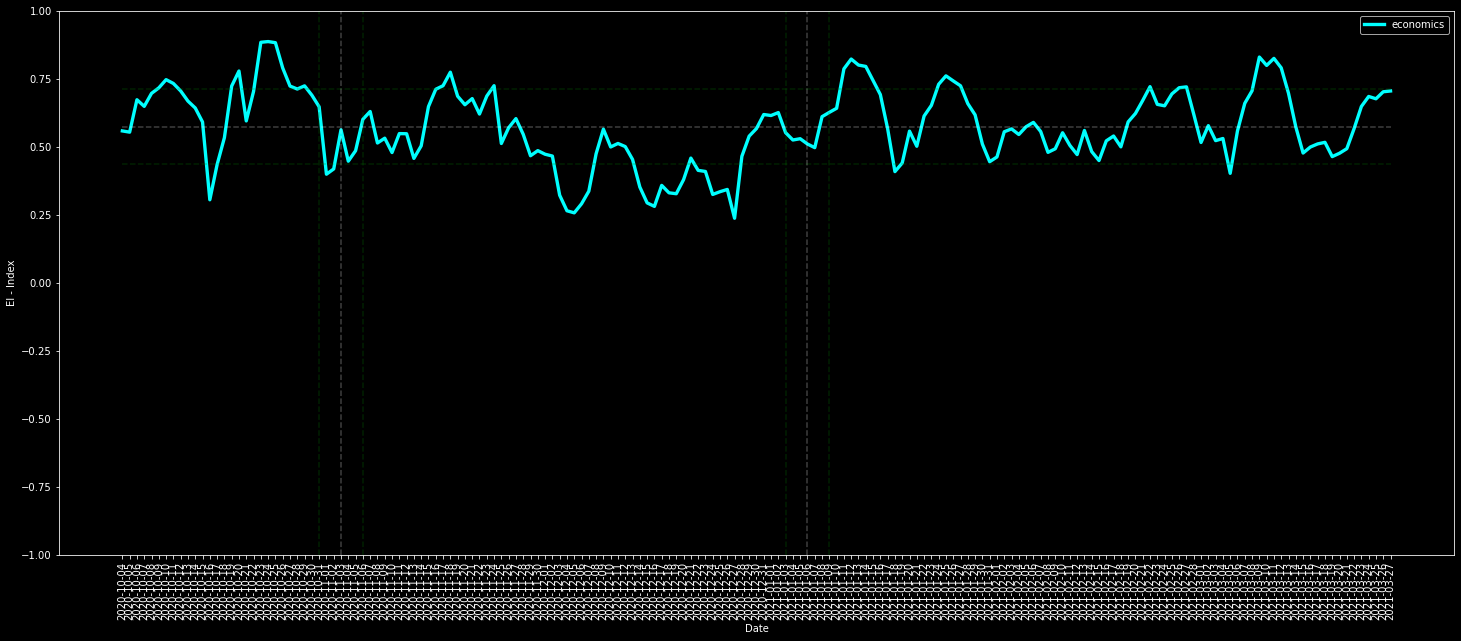

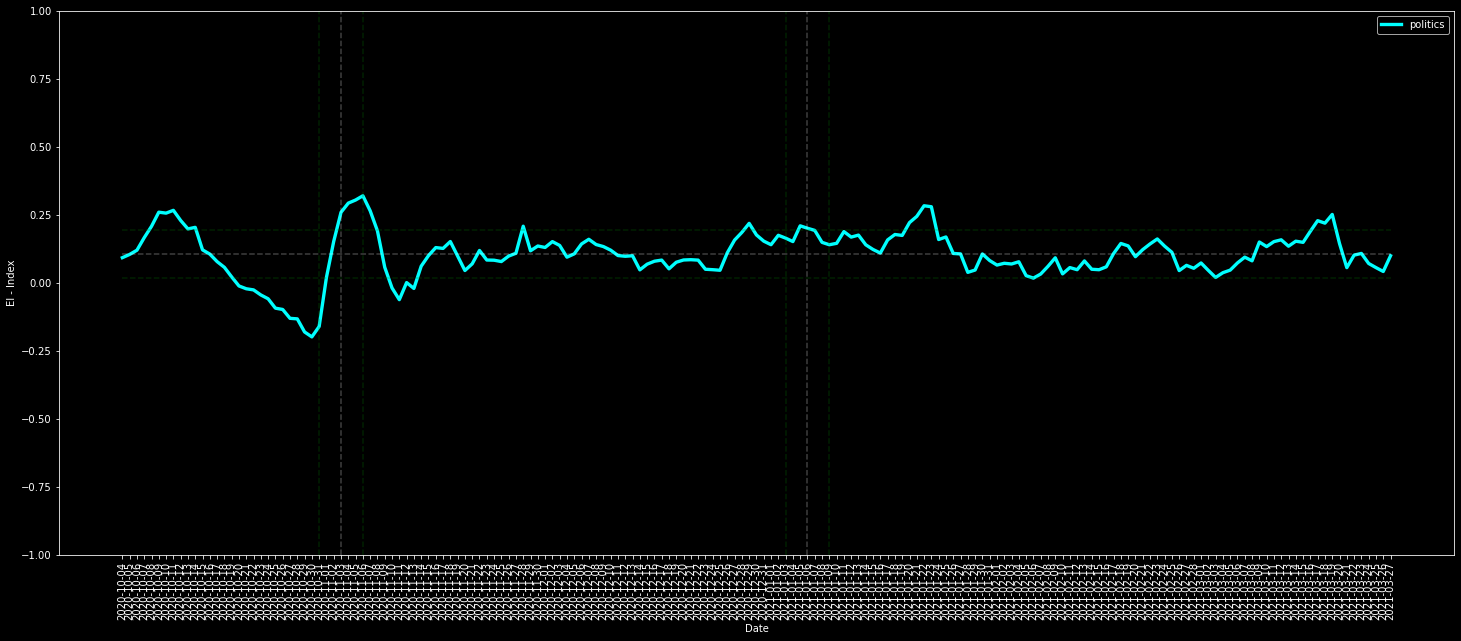

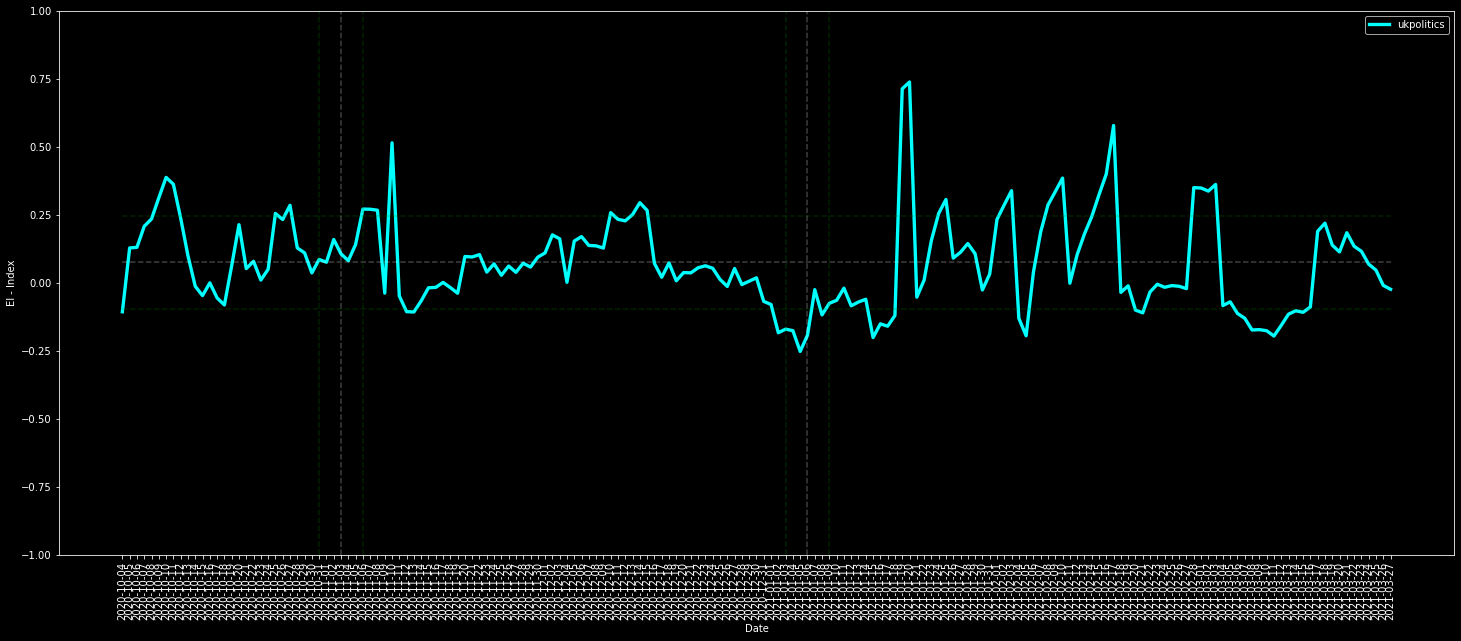

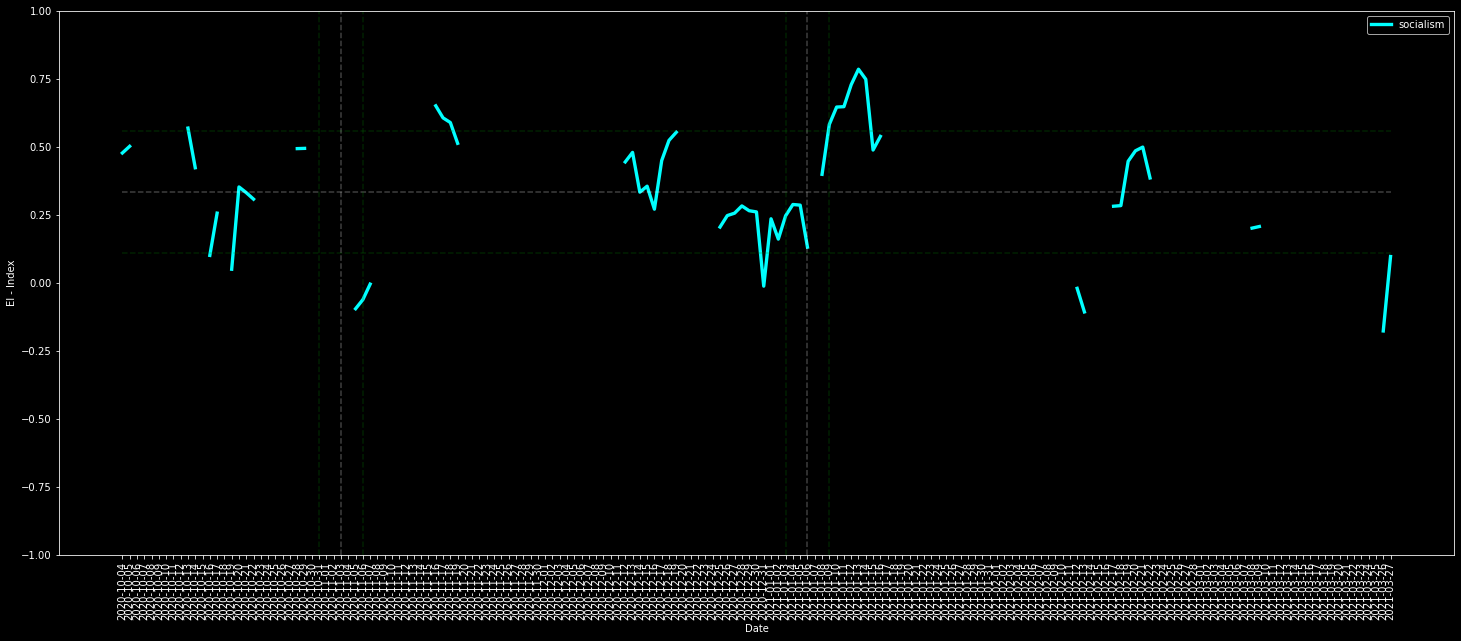

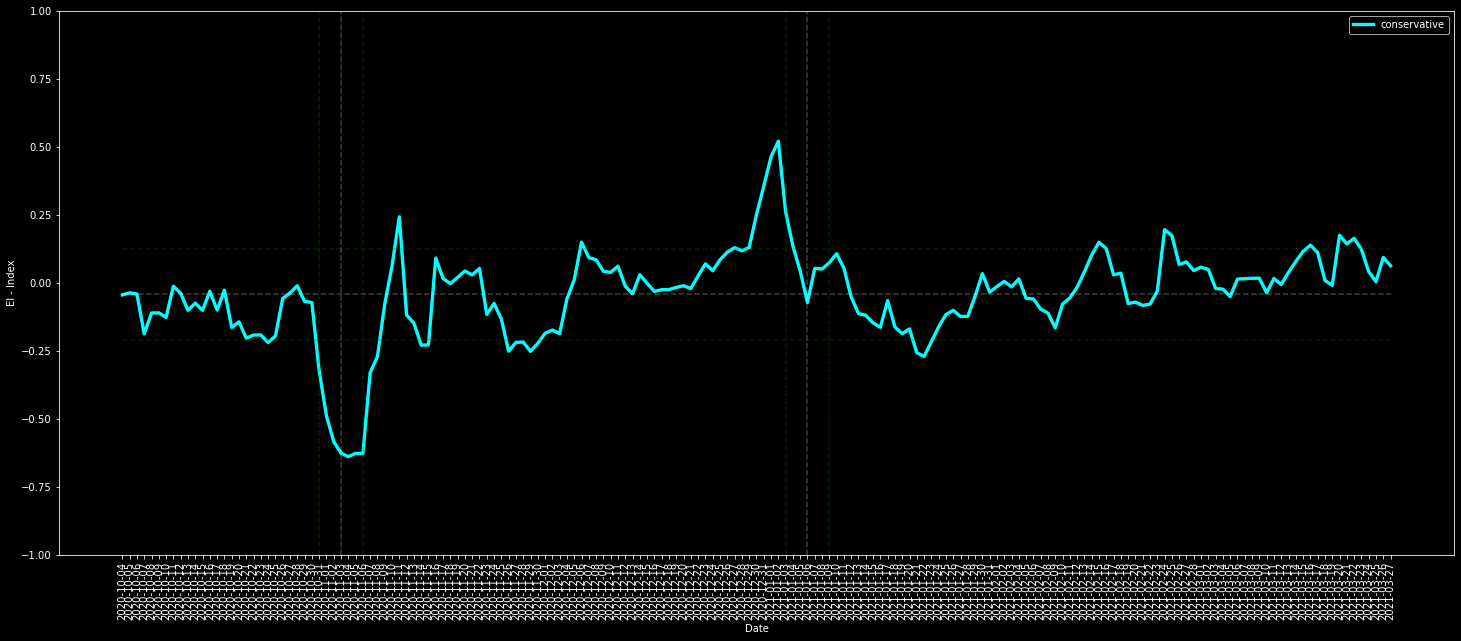

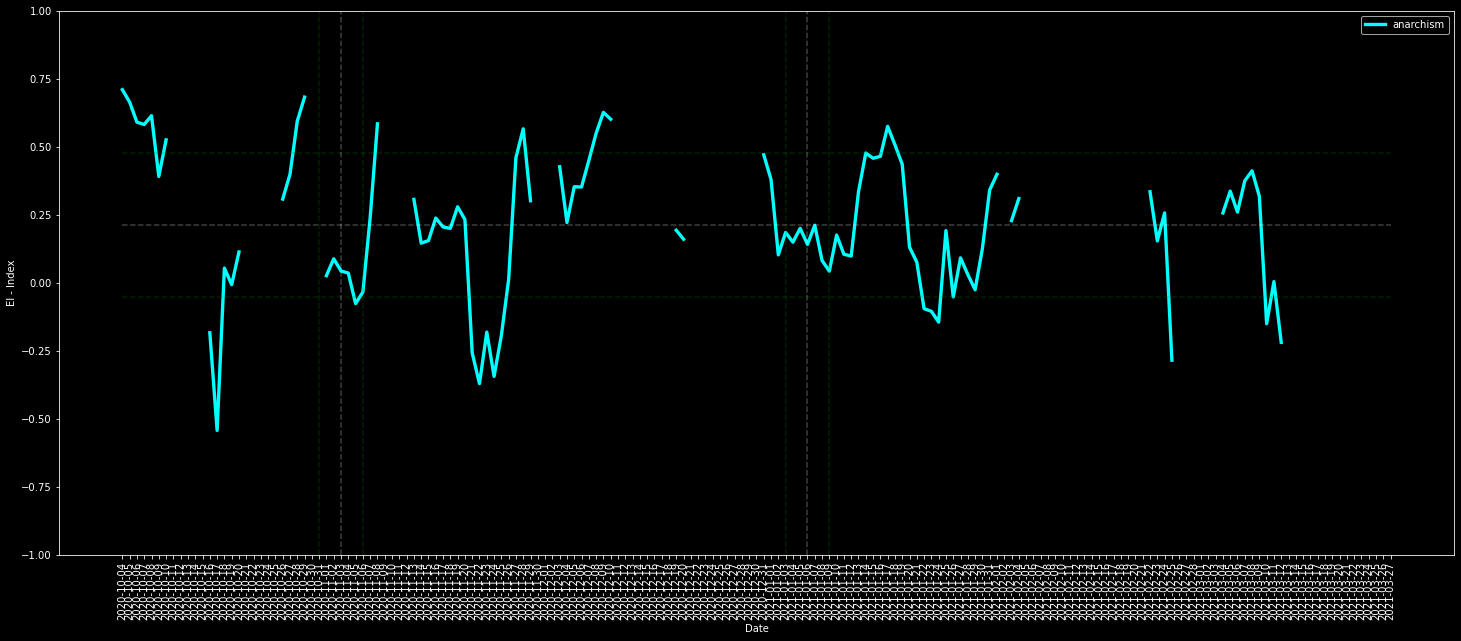

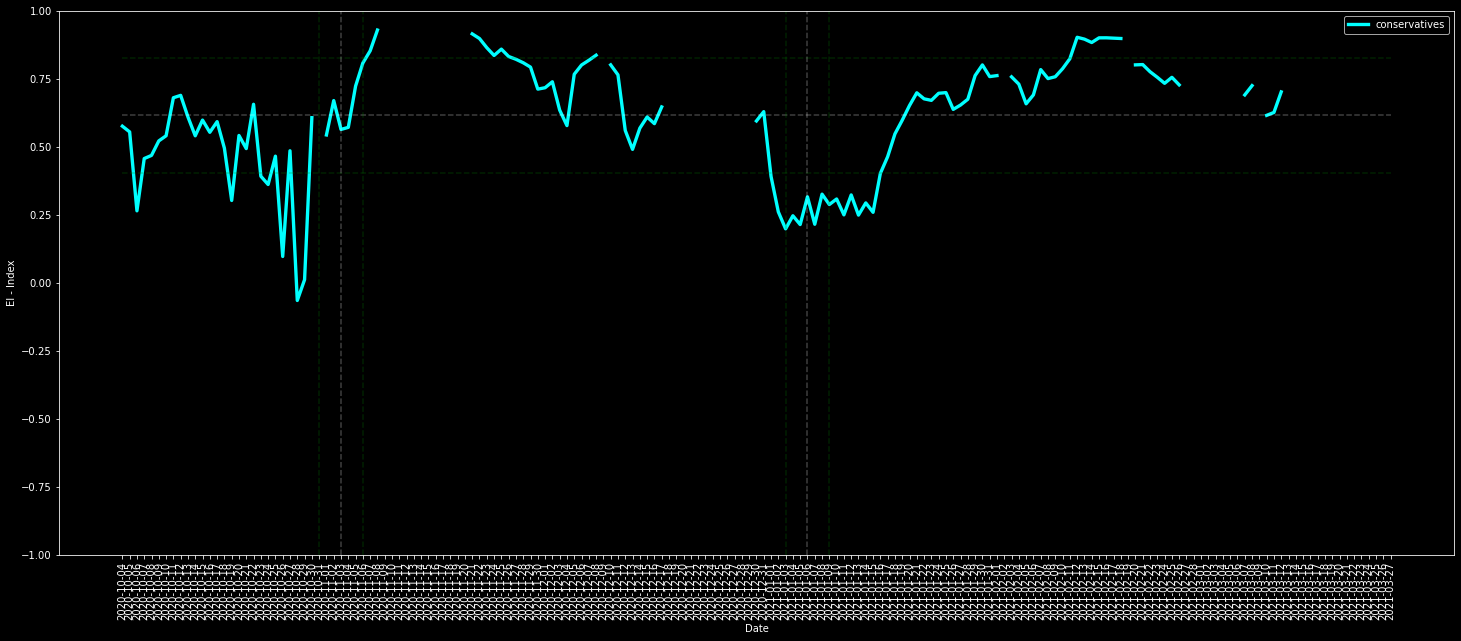

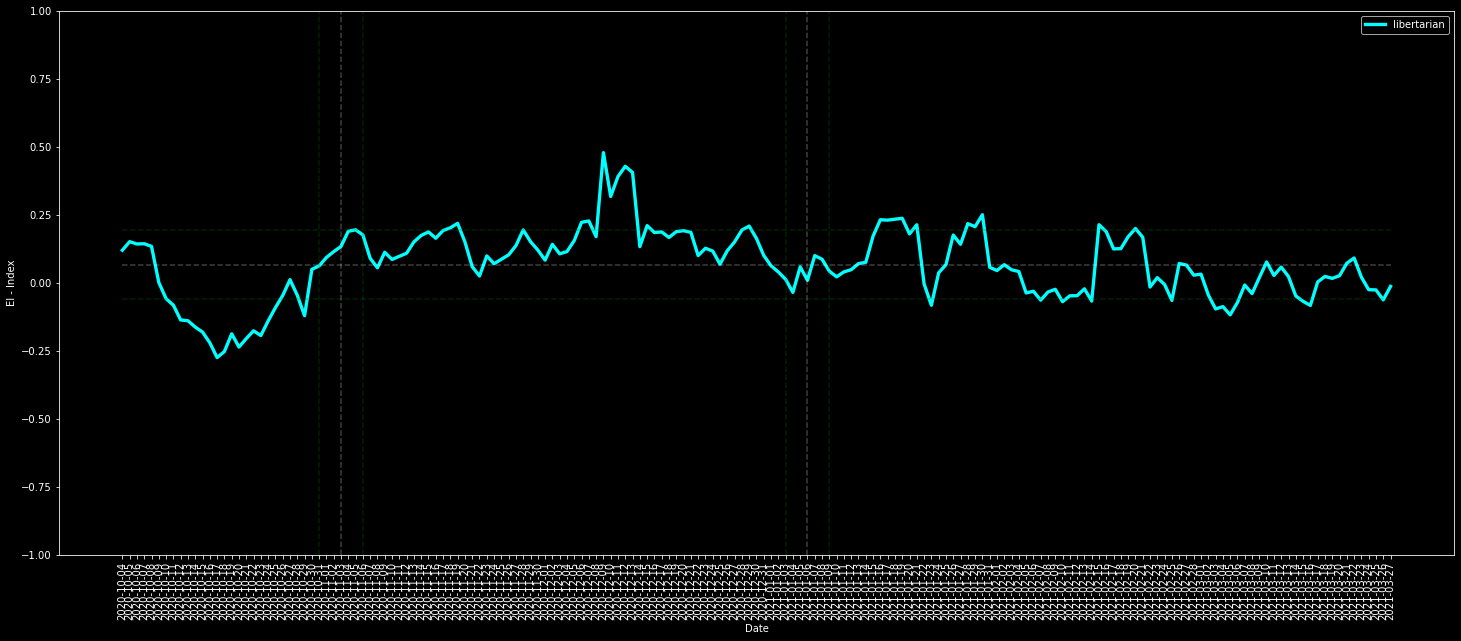

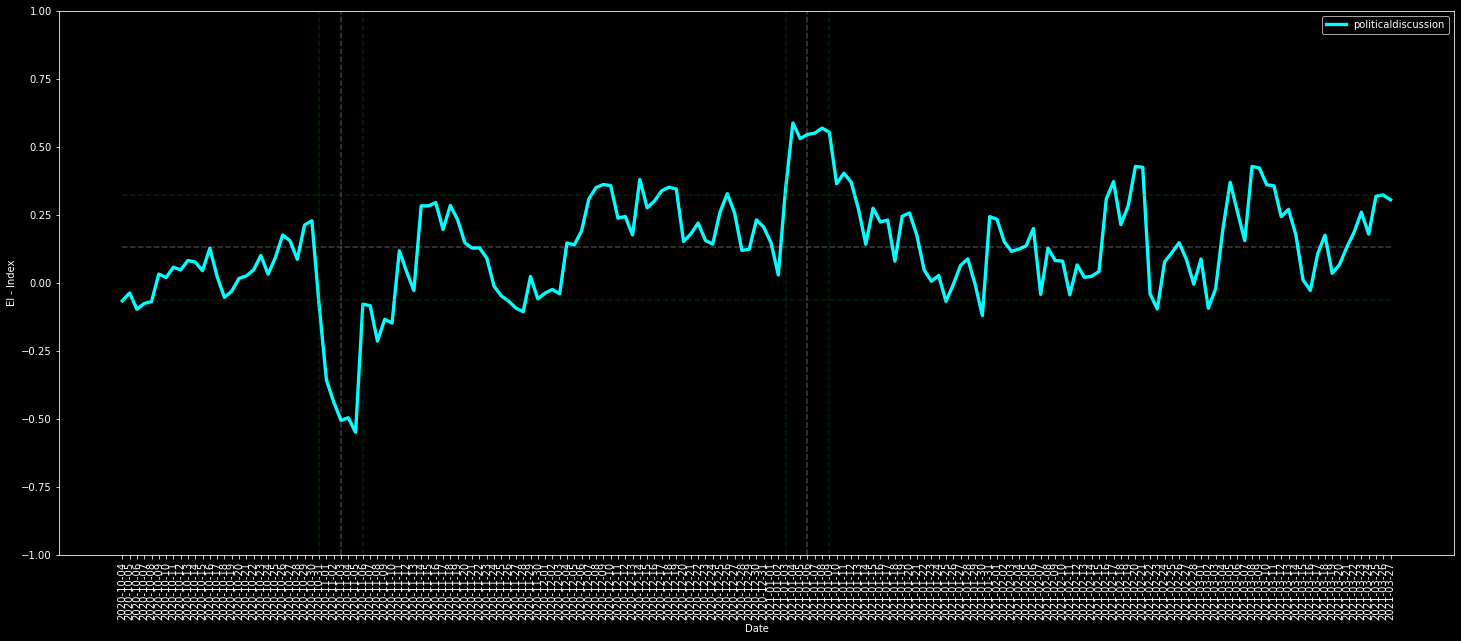

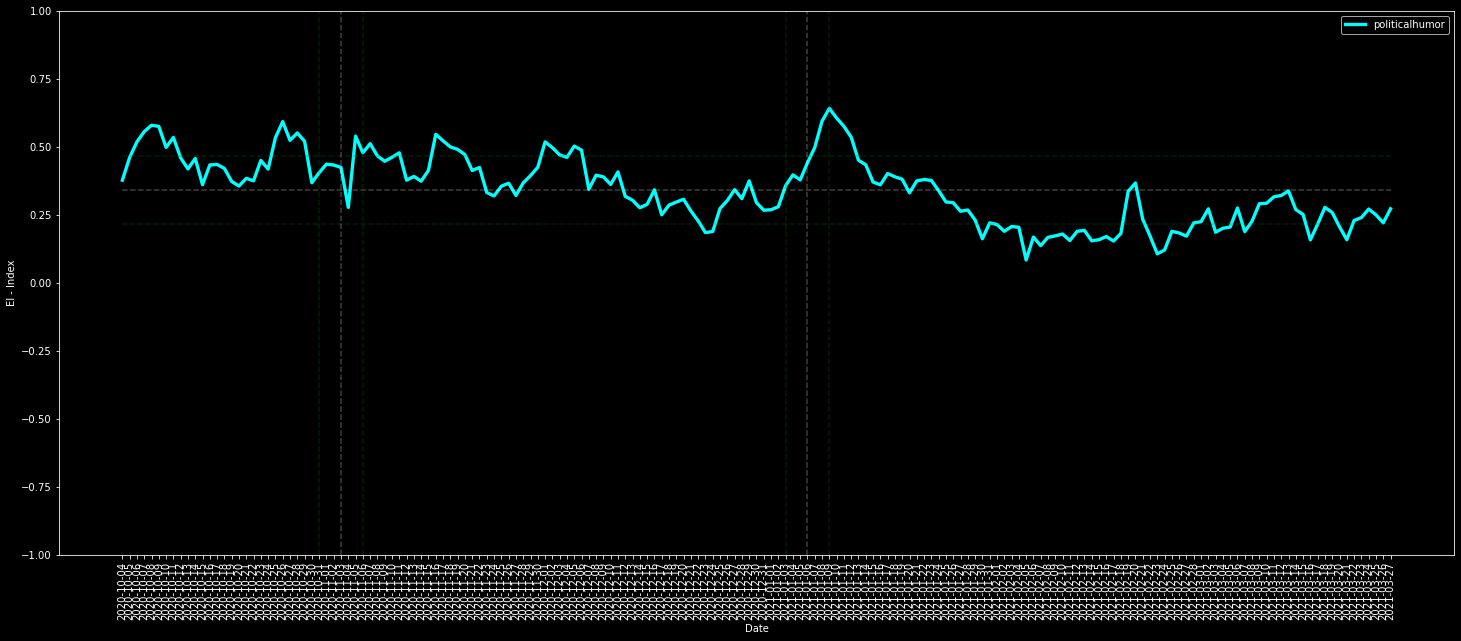

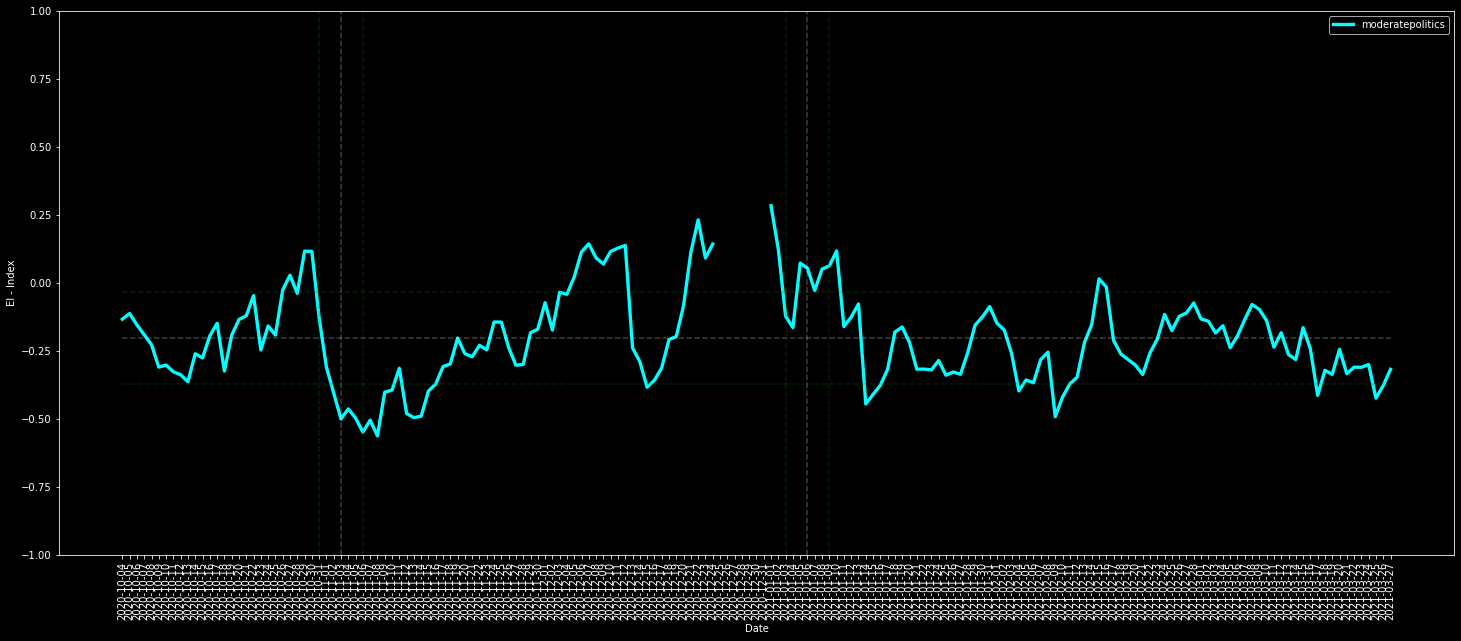

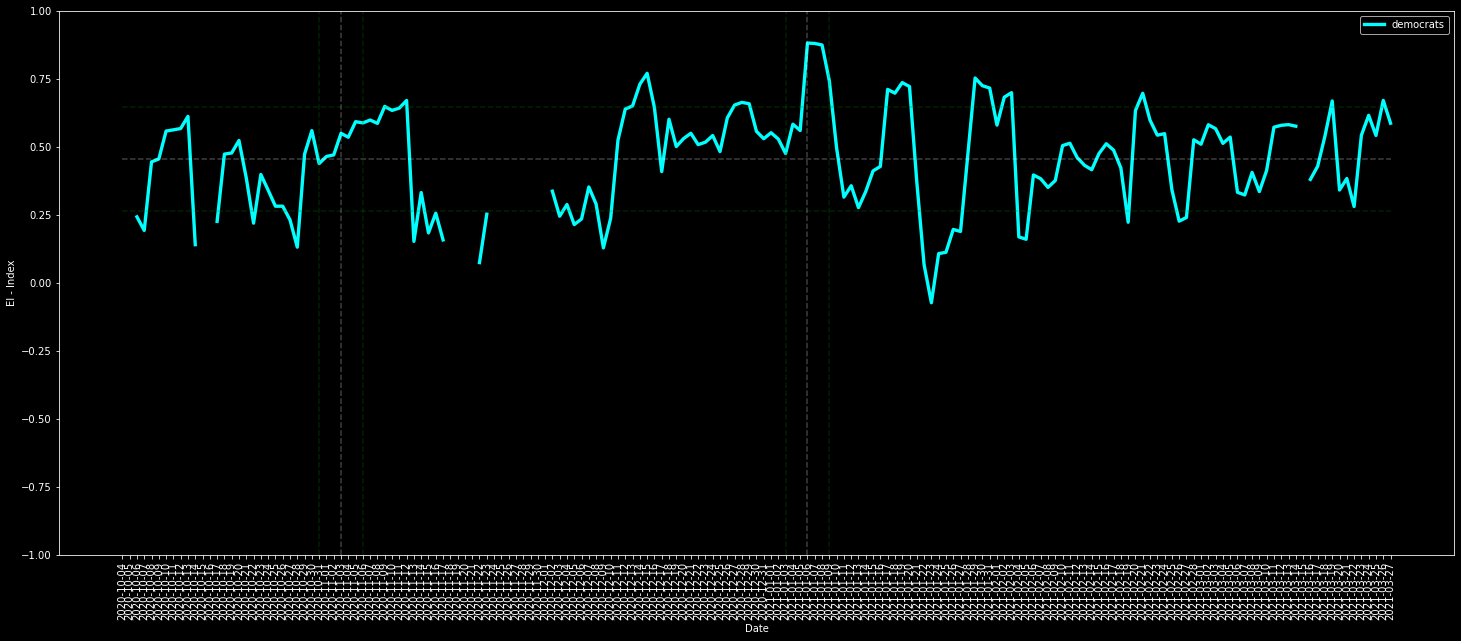

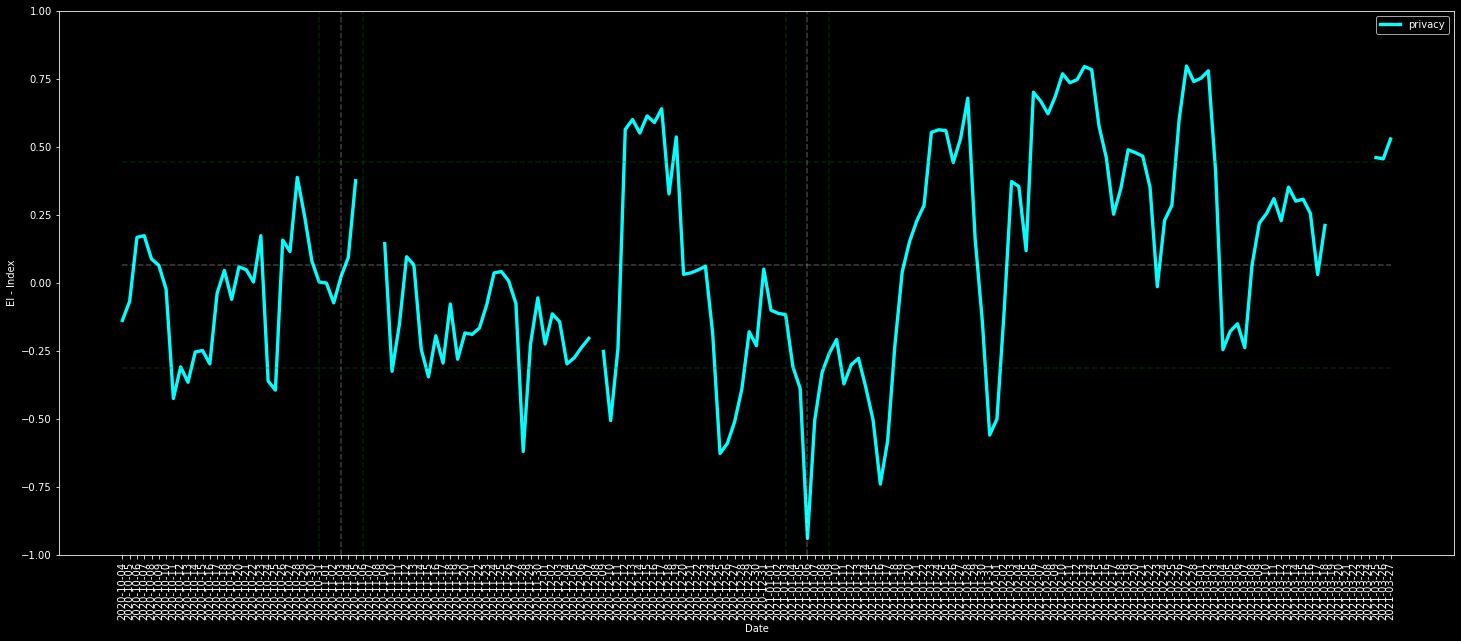

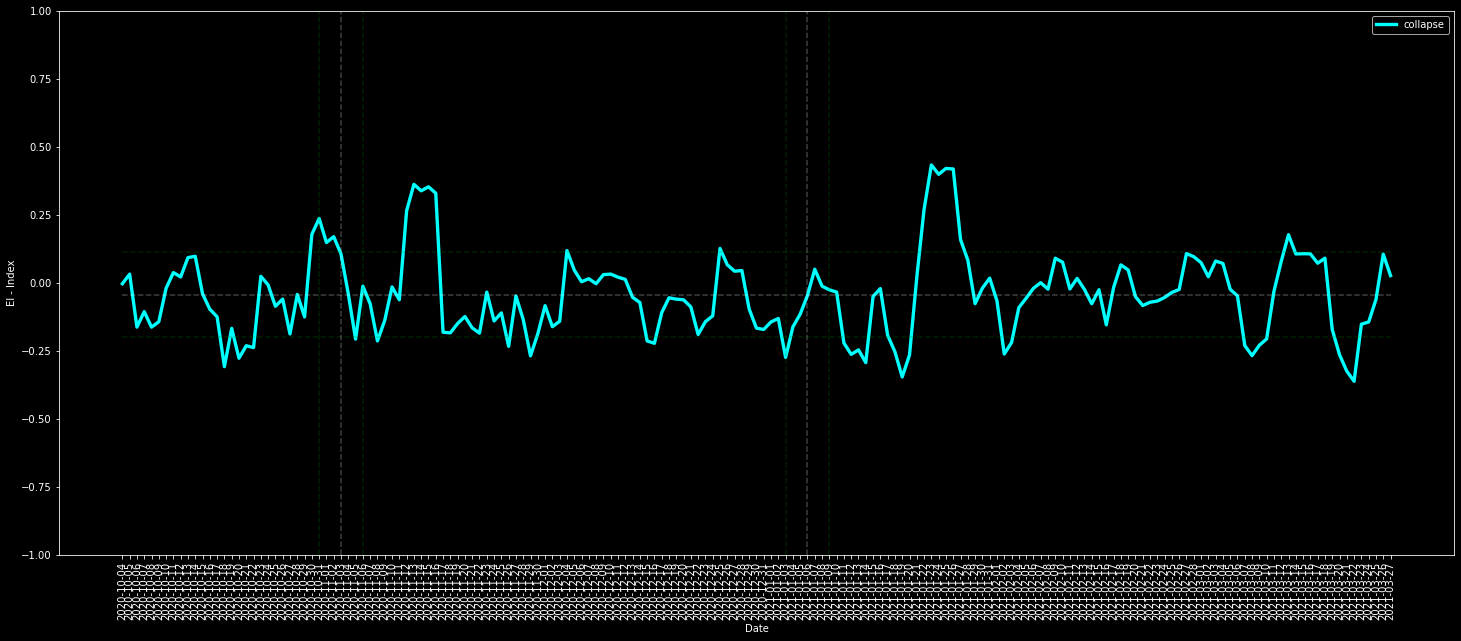

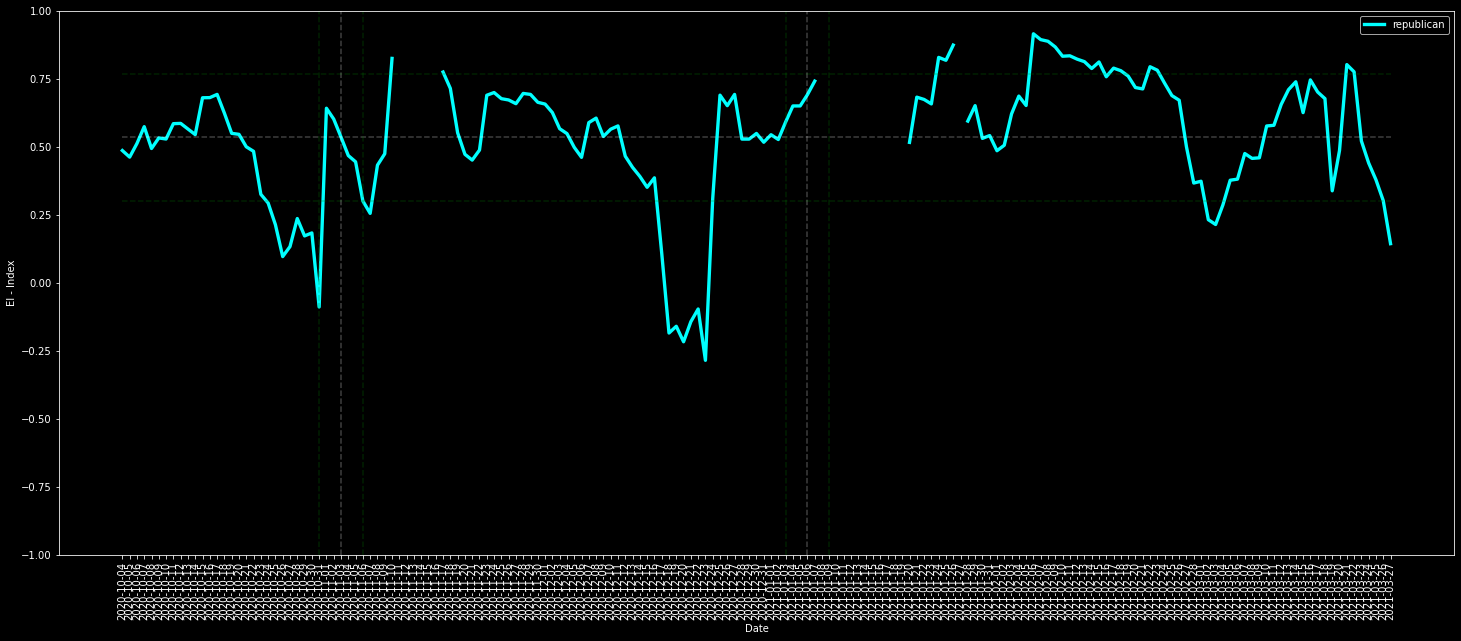

In [20]:
for sub in ei_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('EI - Index')
    mu = ei_data[subbert][sub].mean()
    sig = ei_data[subbert][sub].std()
    # elect_dates = ['2020-10-28','2020-10-29','2020-10-30','2020-10-31','2020-11-01','2020-11-02','2020-11-03','2020-11-04','2020-11-05','2020-11-06','2020-11-07','2020-11-08','2020-11-09']
    elect_dates = ['2020-10-31','2020-11-01','2020-11-02','2020-11-03','2020-11-04','2020-11-05','2020-11-06']
    # inskt_dates = ['2020-12-31','2021-01-01','2021-01-02','2021-01-03','2021-01-04','2021-01-05','2021-01-06','2021-01-07','2021-01-08','2021-01-09','2021-01-10','2021-01-11','2021-01-12']
    inskt_dates = ['2021-01-03','2021-01-04','2021-01-05','2021-01-06','2021-01-07','2021-01-08','2021-01-09']
    elect_vales = [(mu - ei_data[subbert][sub][date]) / sig for date in elect_dates]
    print(sub, 'election imporntance :', pd.Series(elect_vales).mean())
    inskt_vales = [(mu - ei_data[subbert][sub][date]) / sig for date in inskt_dates]
    print(sub, 'insurrection imporntance :', pd.Series(inskt_vales).mean())
    plt.plot(['2020-10-04','2021-03-27'], [mu+sig,mu+sig], alpha=0.25, c='green', ls='--')
    plt.plot(['2020-10-04','2021-03-27'], [mu-sig,mu-sig], alpha=0.25, c='green', ls='--')
    # plt.plot(['2020-10-04','2021-03-27'], [mu+2*sig,mu+2*sig], alpha=0.25, c='orange', ls='--')
    # plt.plot(['2020-10-04','2021-03-27'], [mu-2*sig,mu-2*sig], alpha=0.25, c='orange', ls='--')
    # plt.plot(['2020-10-04','2021-03-27'], [mu+3*sig,mu+3*sig], alpha=0.25, c='red', ls='--')
    # plt.plot(['2020-10-04','2021-03-27'], [mu-3*sig,mu-3*sig], alpha=0.25, c='red', ls='--')
    plt.plot(['2020-10-04','2021-03-27'], [mu,mu], alpha=0.25, c='white', ls='--')
    plt.plot(['2021-01-06','2021-01-06'], [-1,1], alpha=0.25, c='white', ls='--')
    plt.plot(['2021-01-09','2021-01-09'], [-1,1], alpha=0.25, c='green', ls='--')
    plt.plot(['2021-01-03','2021-01-03'], [-1,1], alpha=0.25, c='green', ls='--')
    # plt.plot(['2020-12-31','2020-12-31'], [-1,1], alpha=0.25, c='orange', ls='--')
    # plt.plot(['2021-01-12','2021-01-12'], [-1,1], alpha=0.25, c='orange', ls='--')
    plt.plot(['2020-11-03','2020-11-03'], [-1,1], alpha=0.25, c='white', ls='--')
    plt.plot(['2020-10-31','2020-10-31'], [-1,1], alpha=0.25, c='green', ls='--')
    plt.plot(['2020-11-06','2020-11-06'], [-1,1], alpha=0.25, c='green', ls='--')
    # plt.plot(['2020-10-28','2020-10-28'], [-1,1], alpha=0.25, c='orange', ls='--')
    # plt.plot(['2020-11-09','2020-11-09'], [-1,1], alpha=0.25, c='orange', ls='--')
    plt.ylim(-1,1)
    plt.legend()

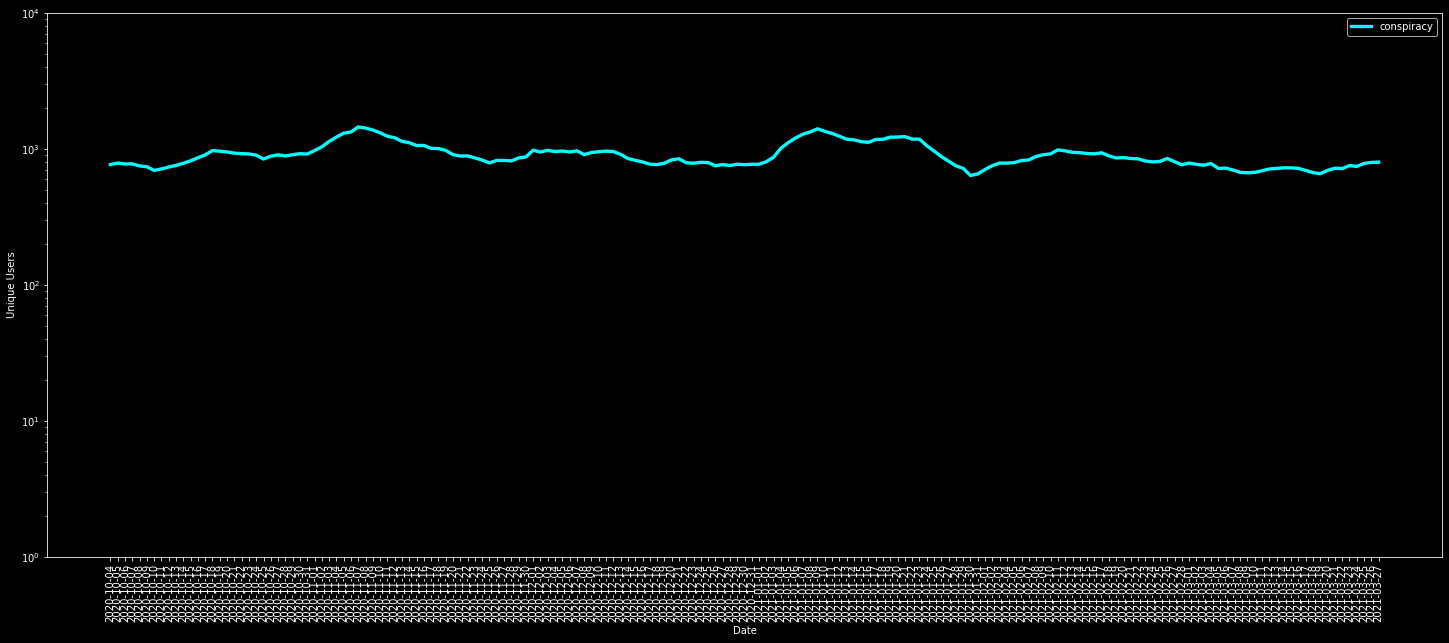

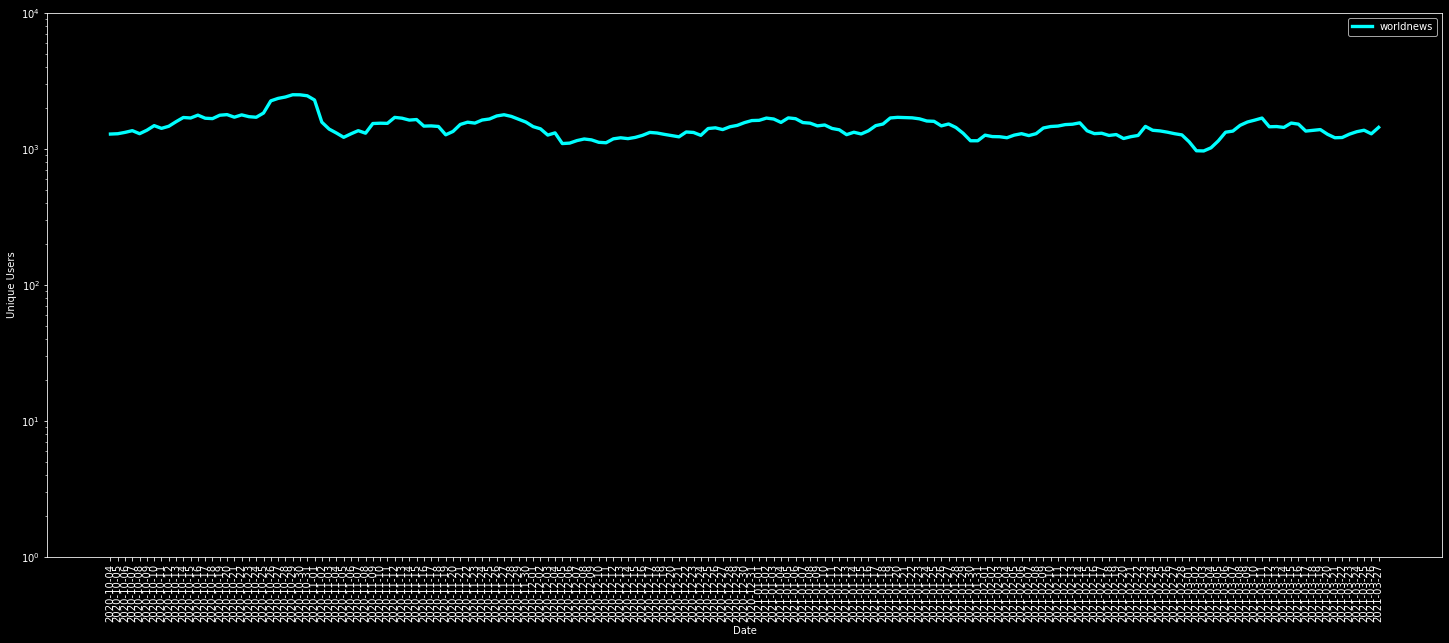

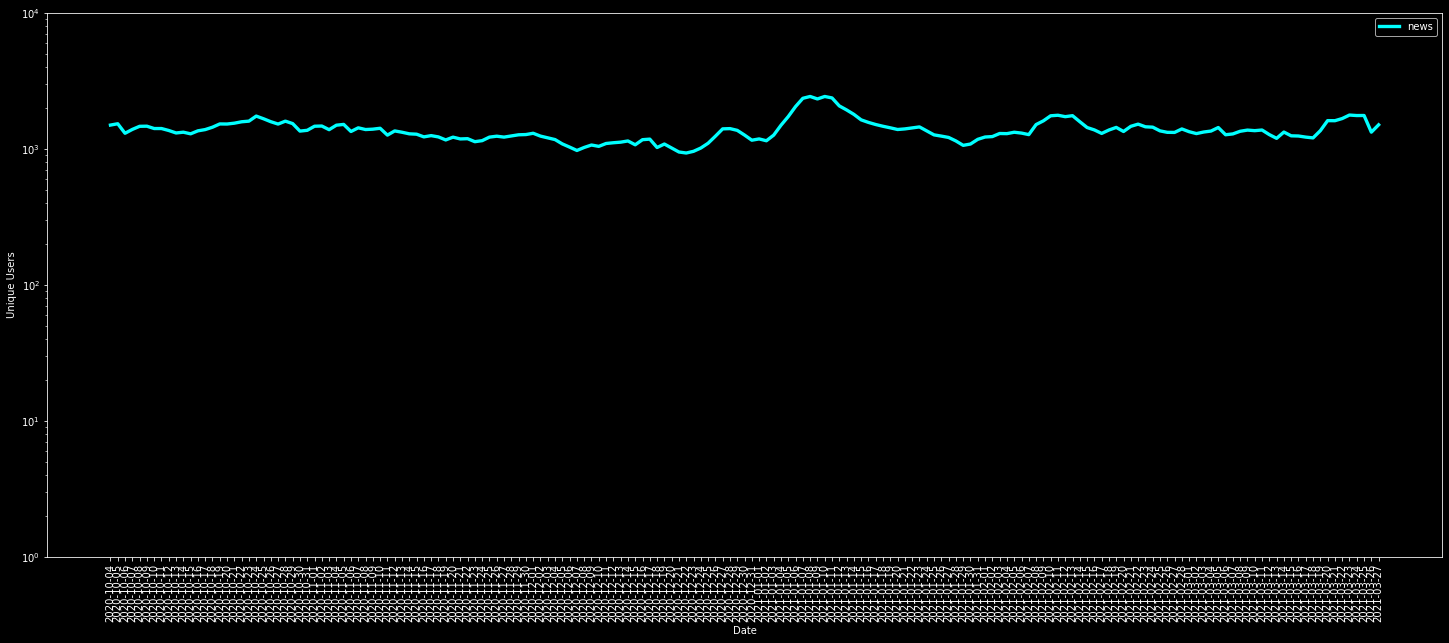

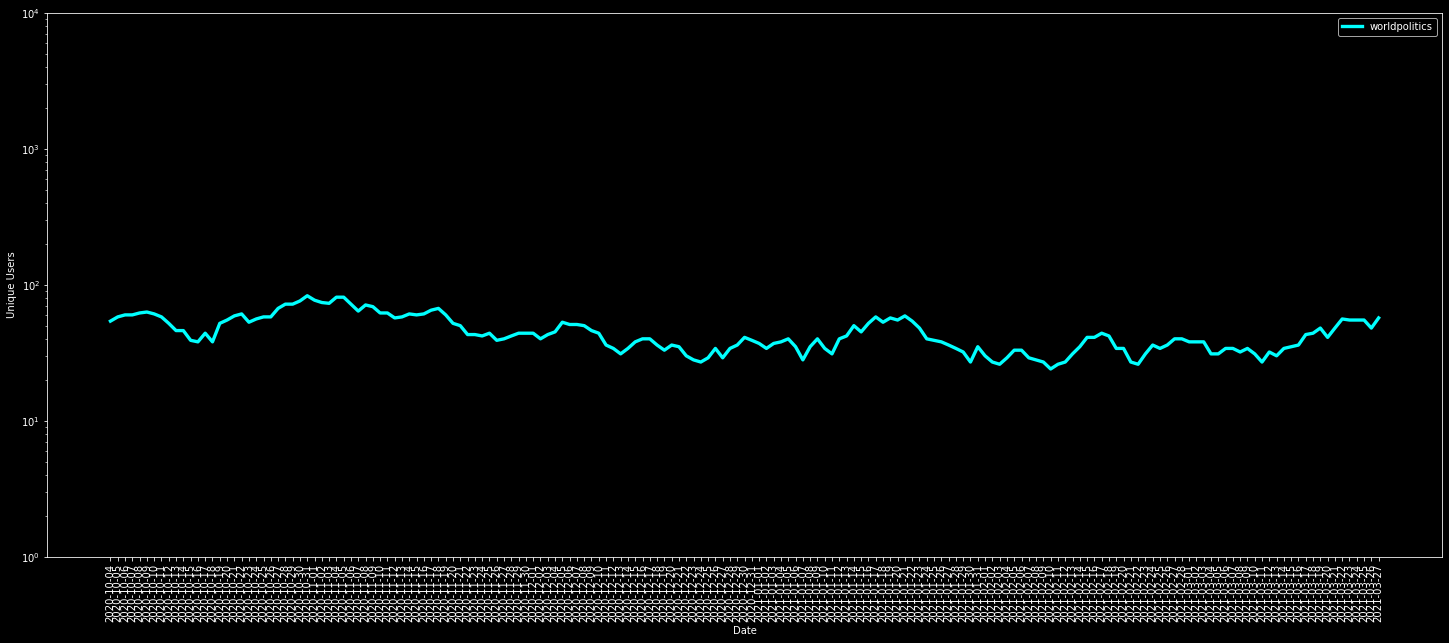

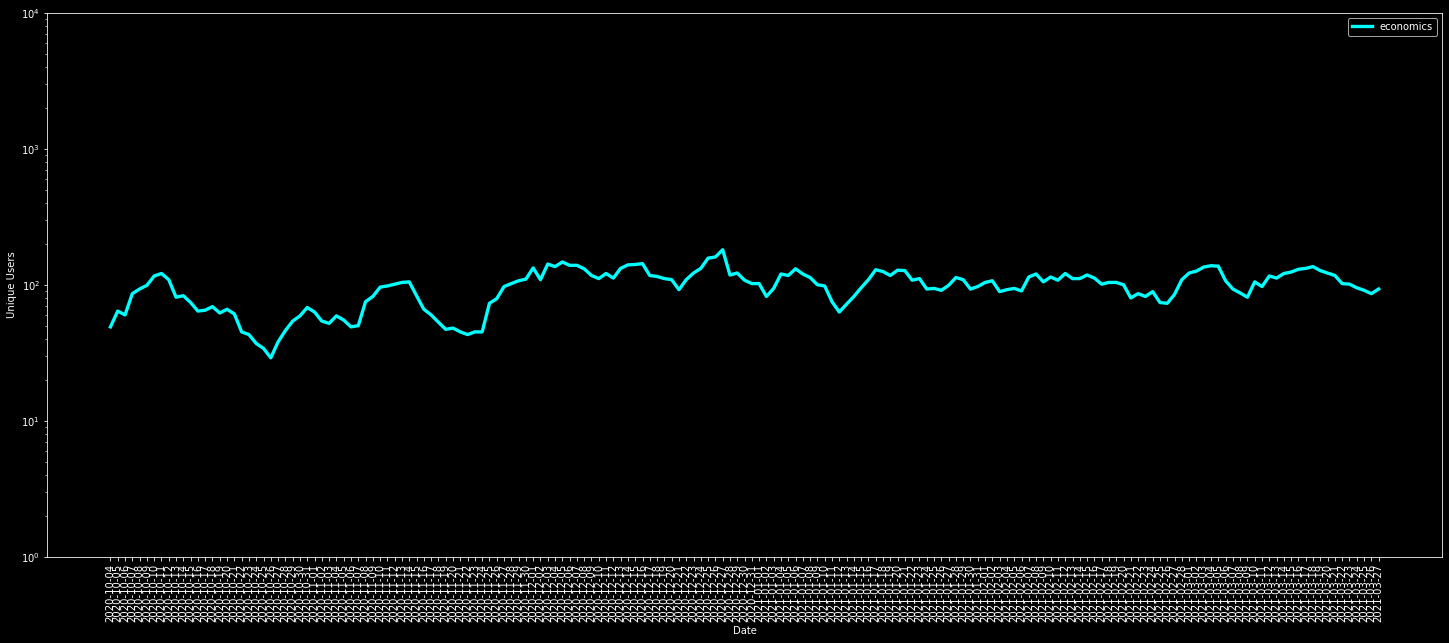

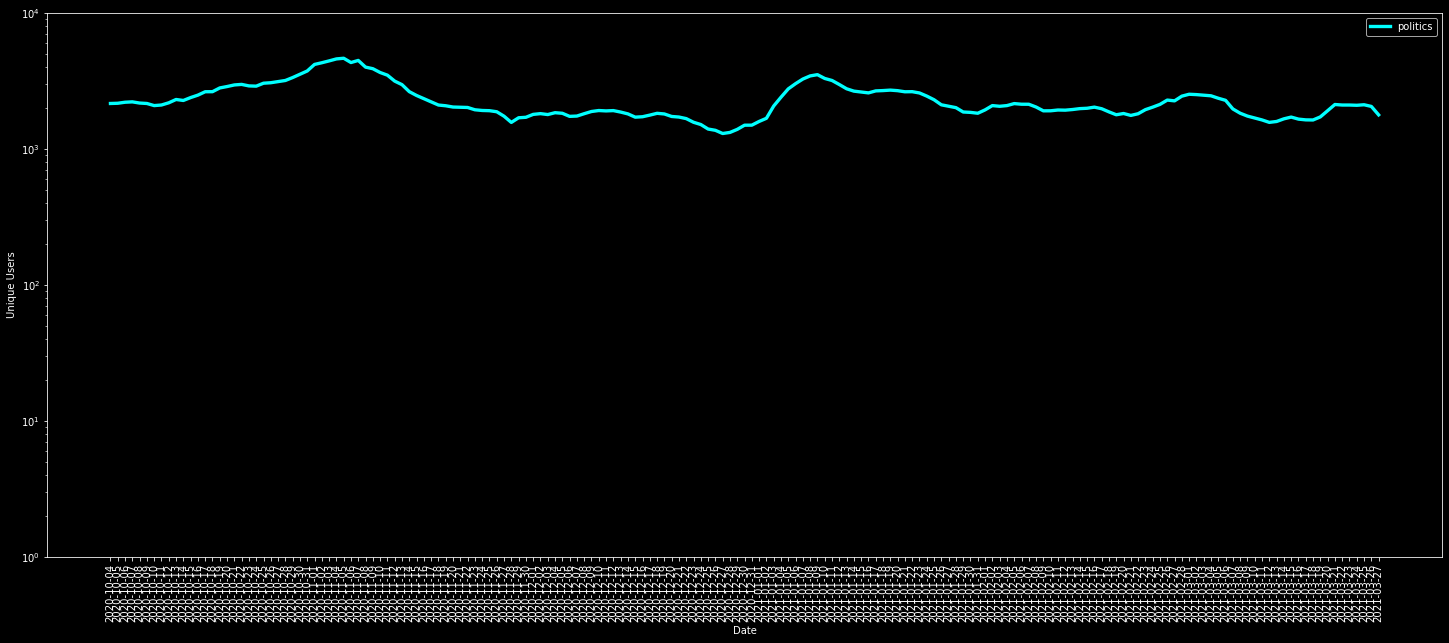

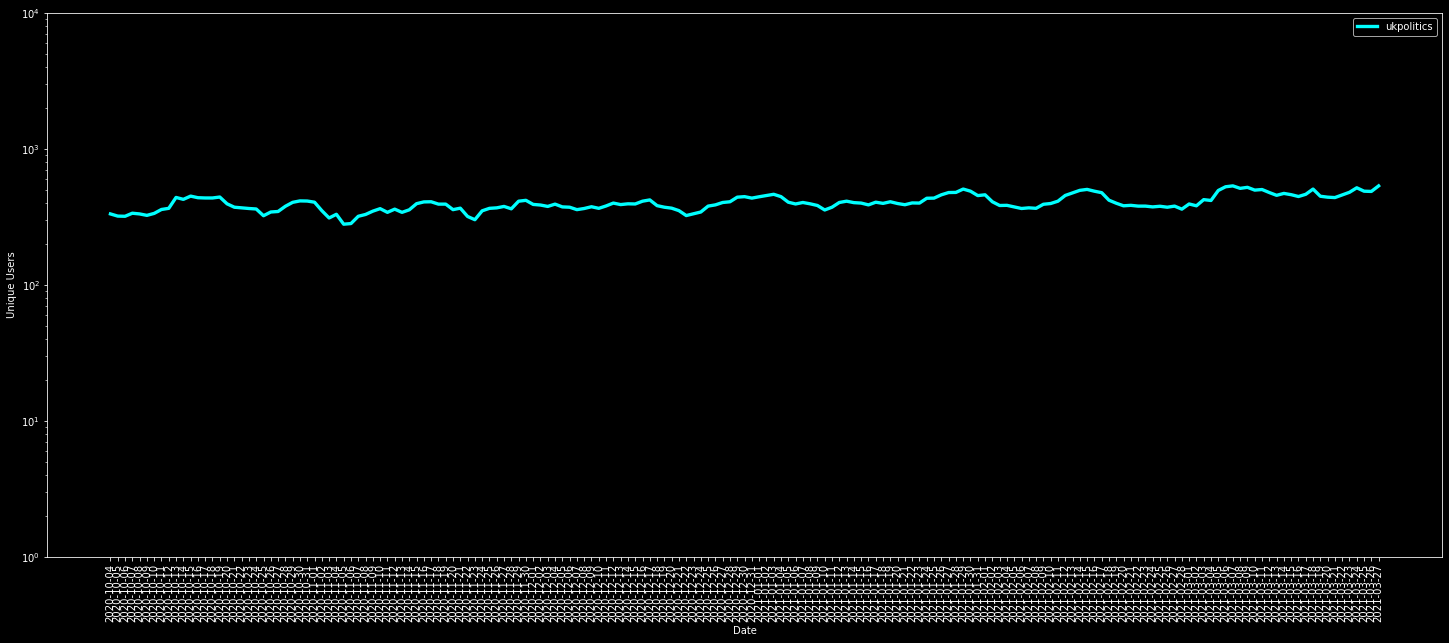

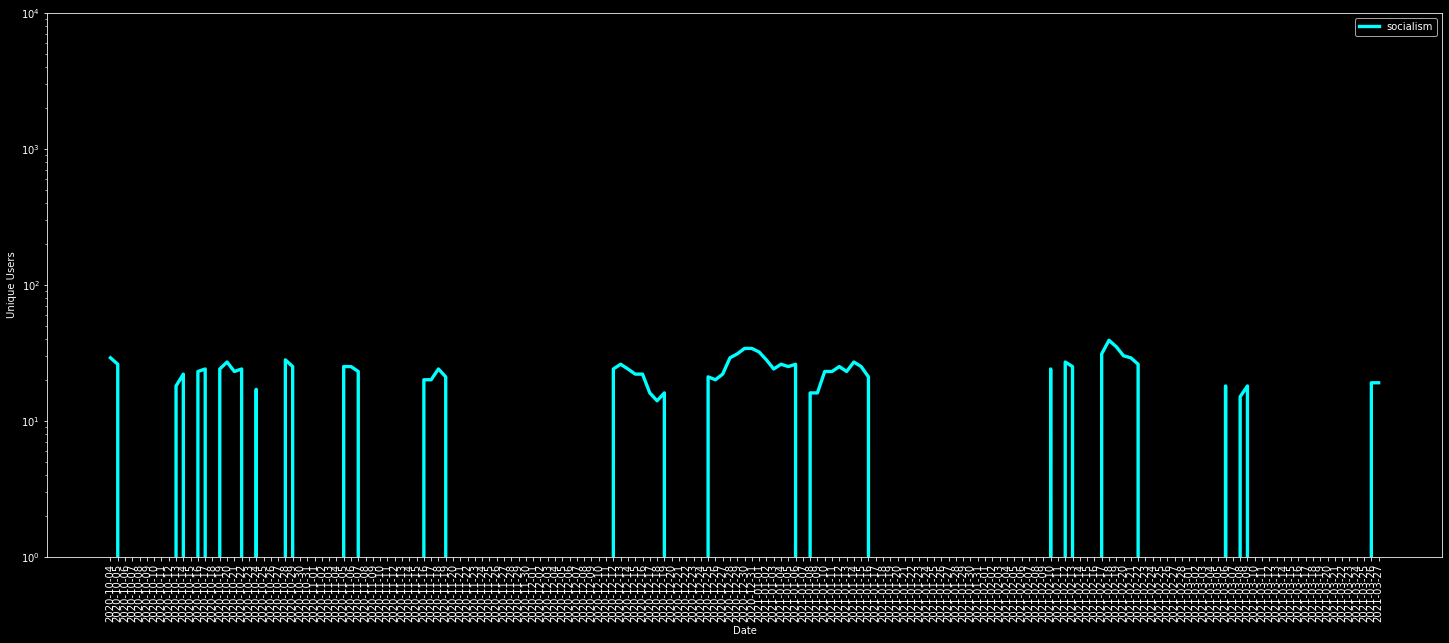

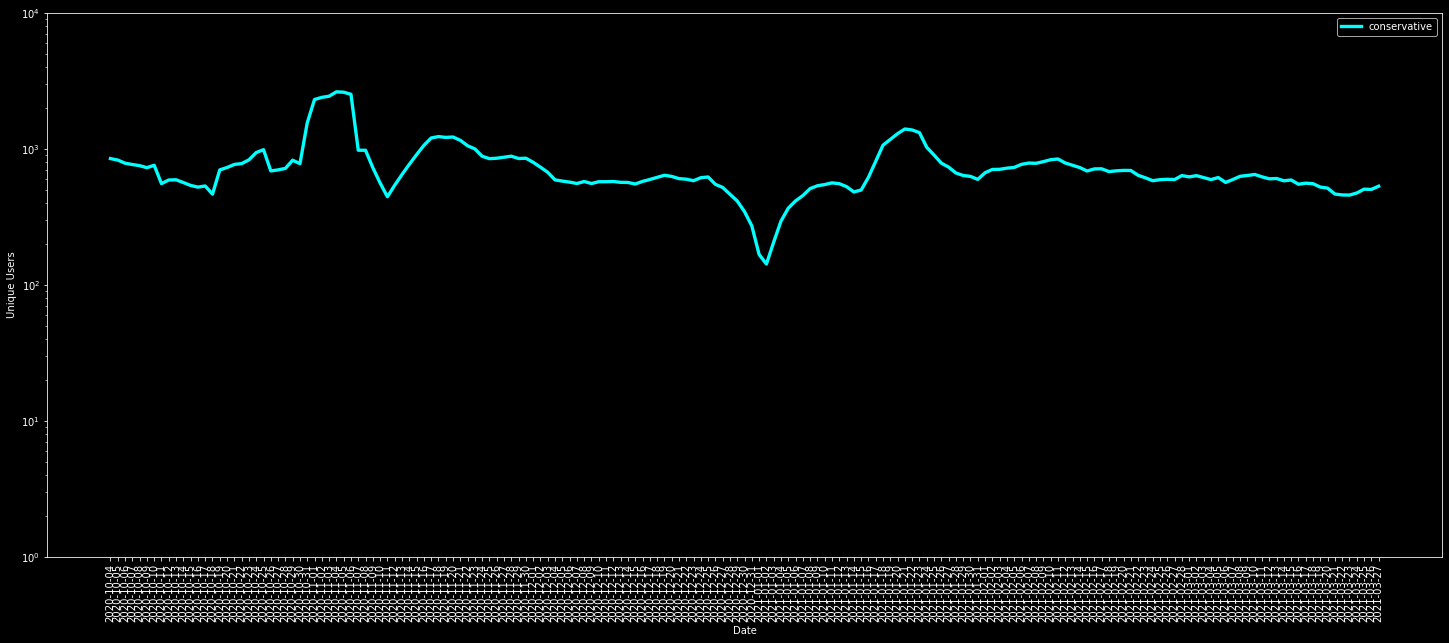

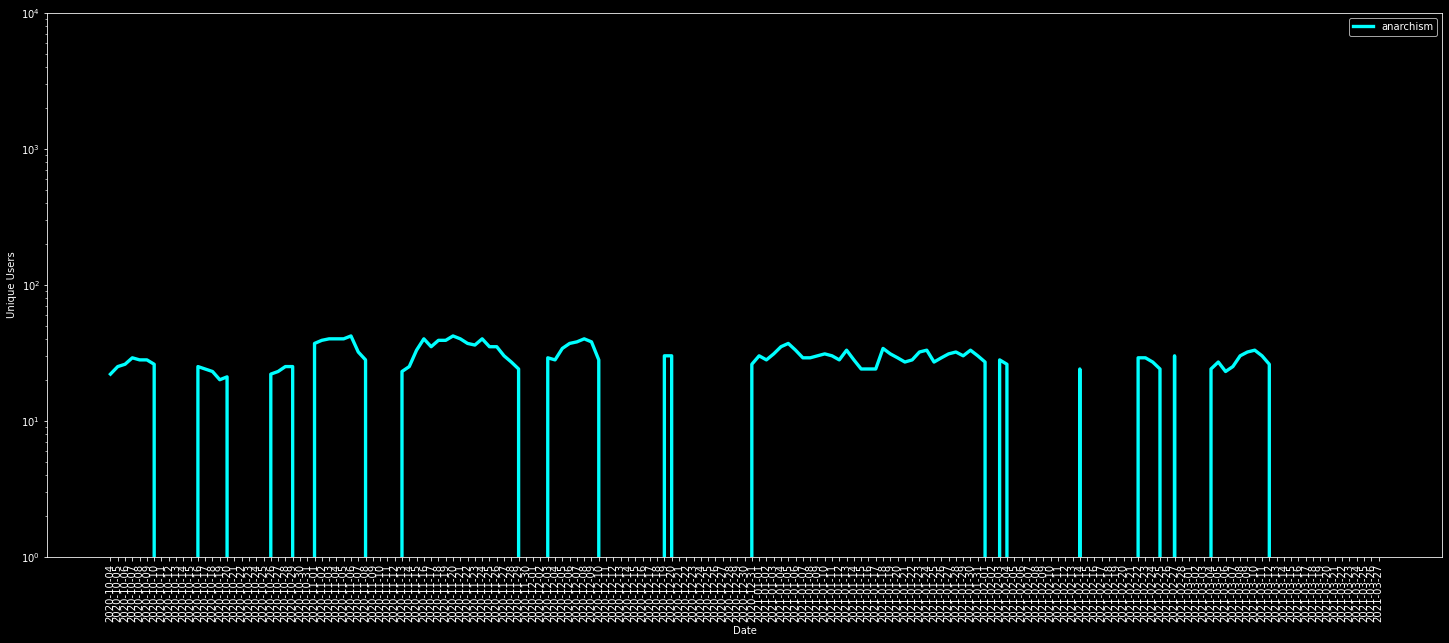

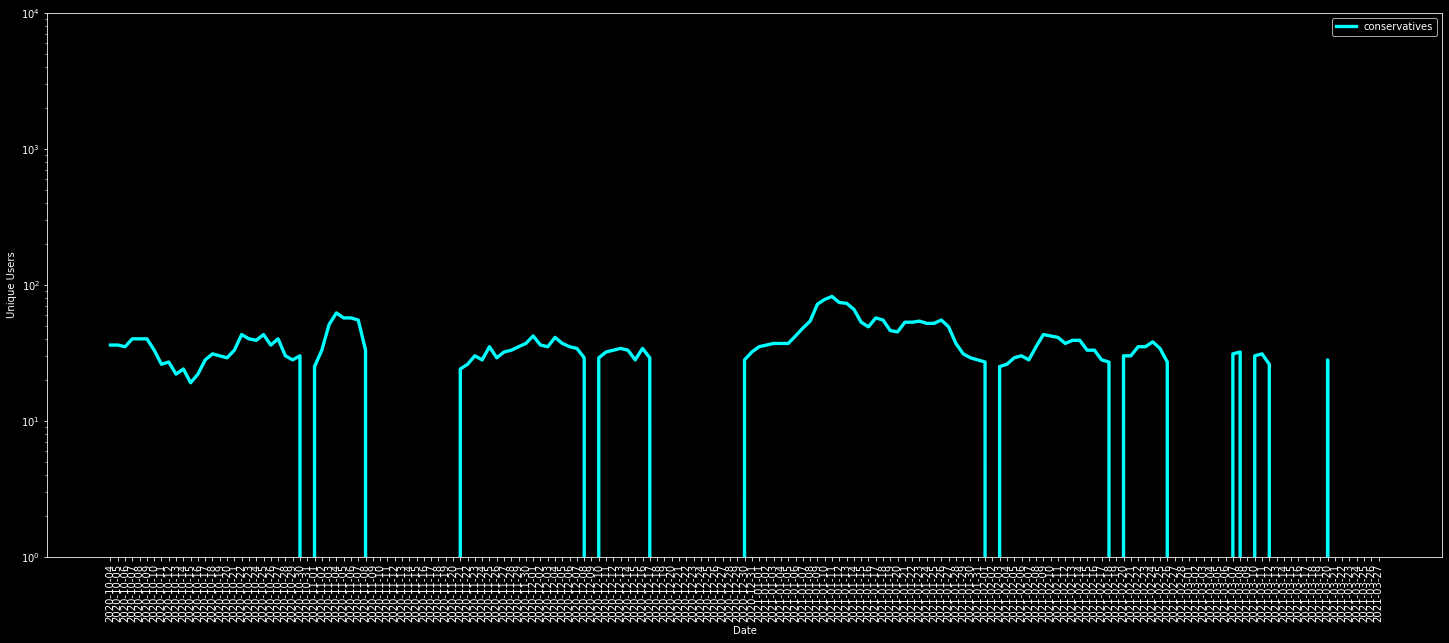

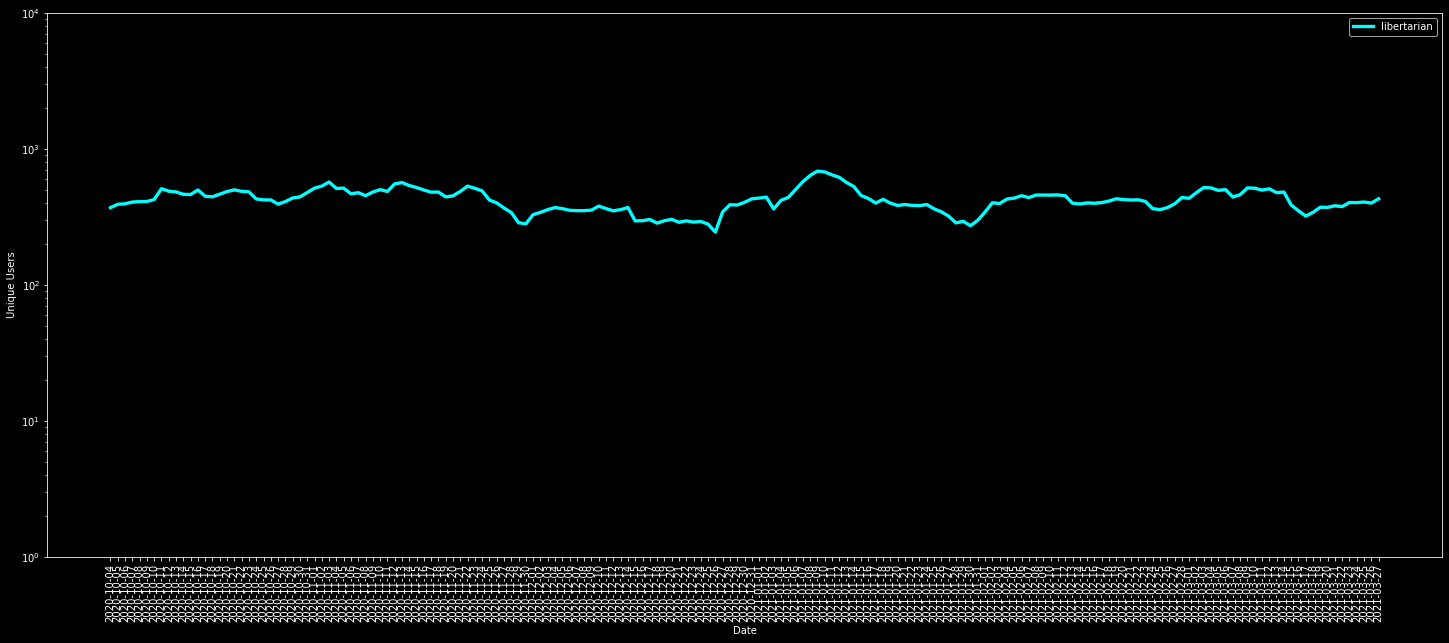

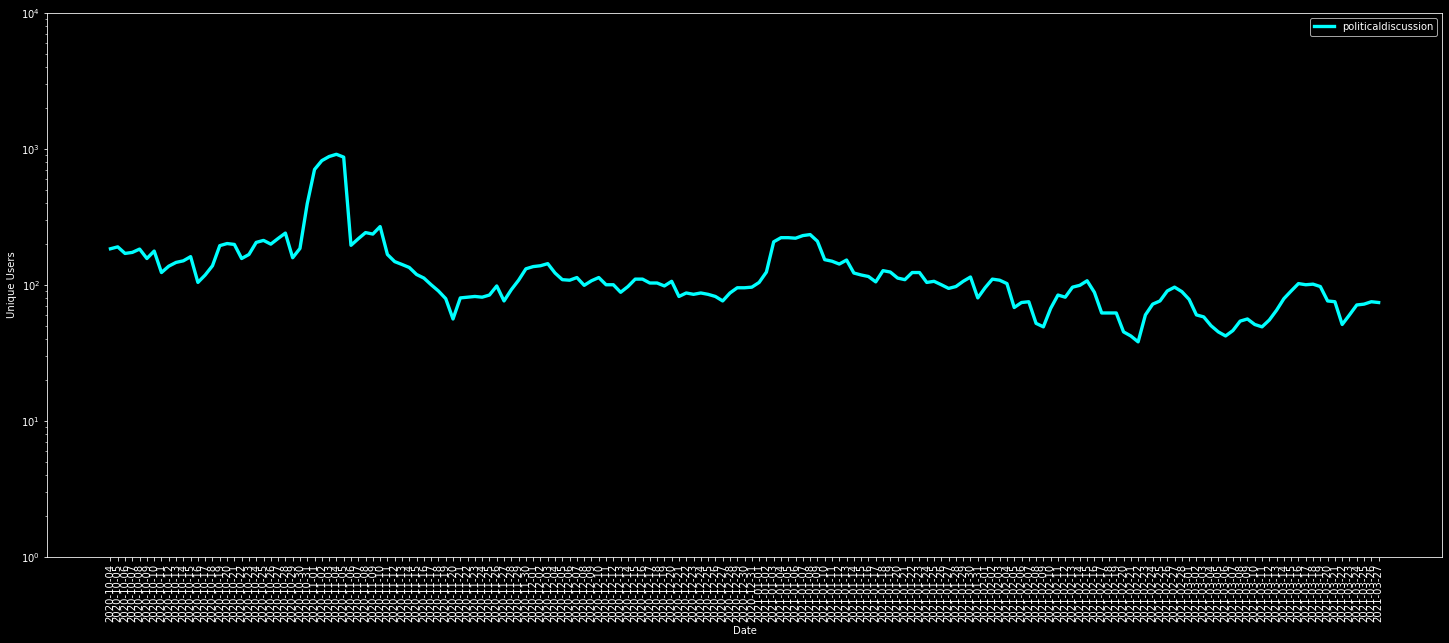

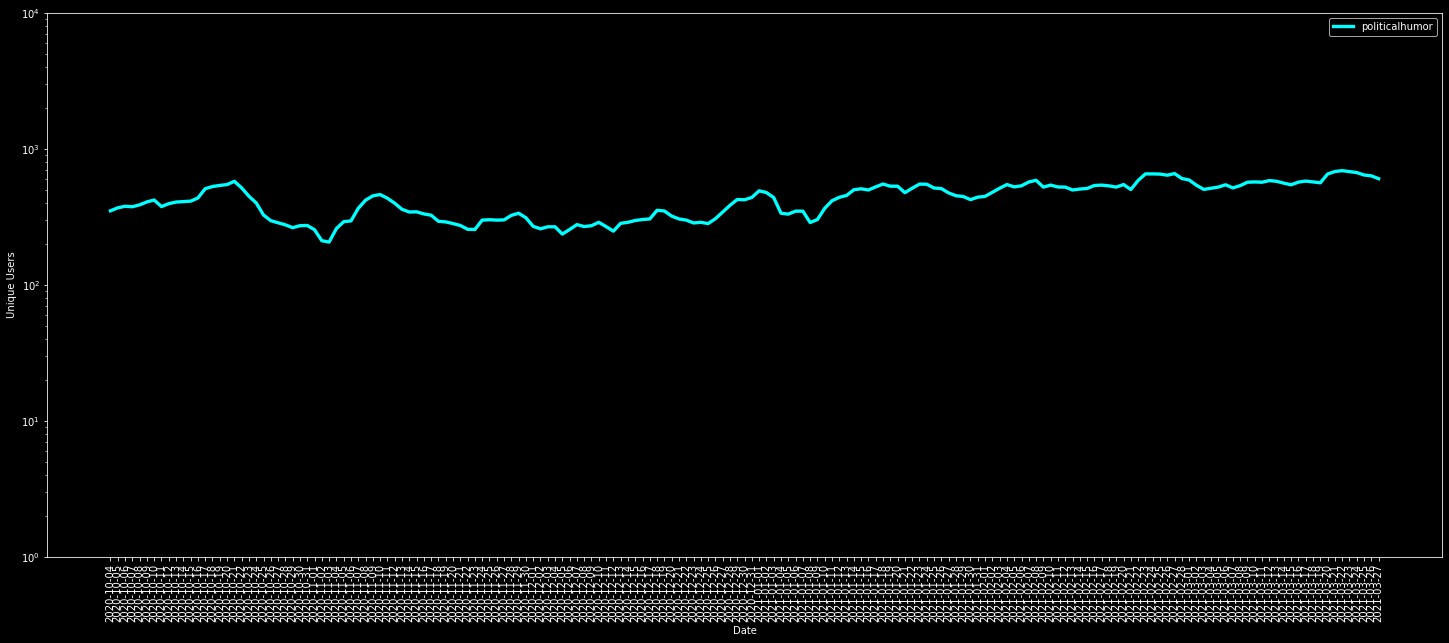

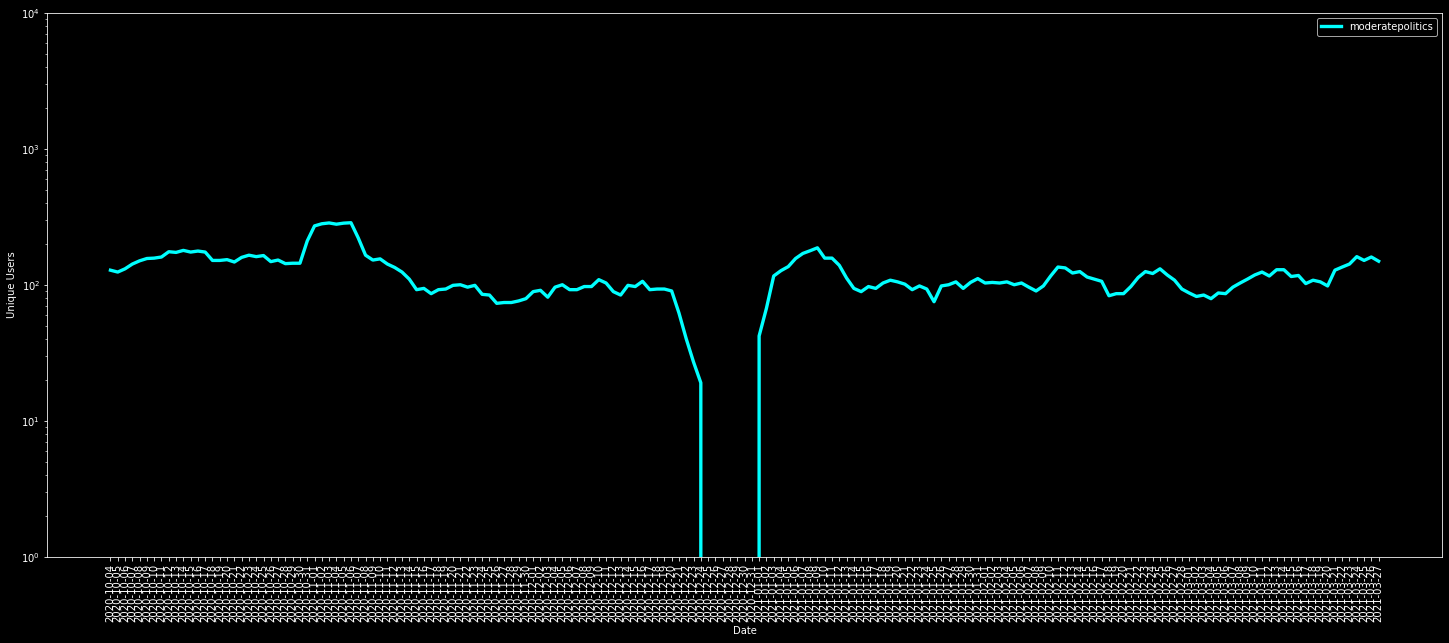

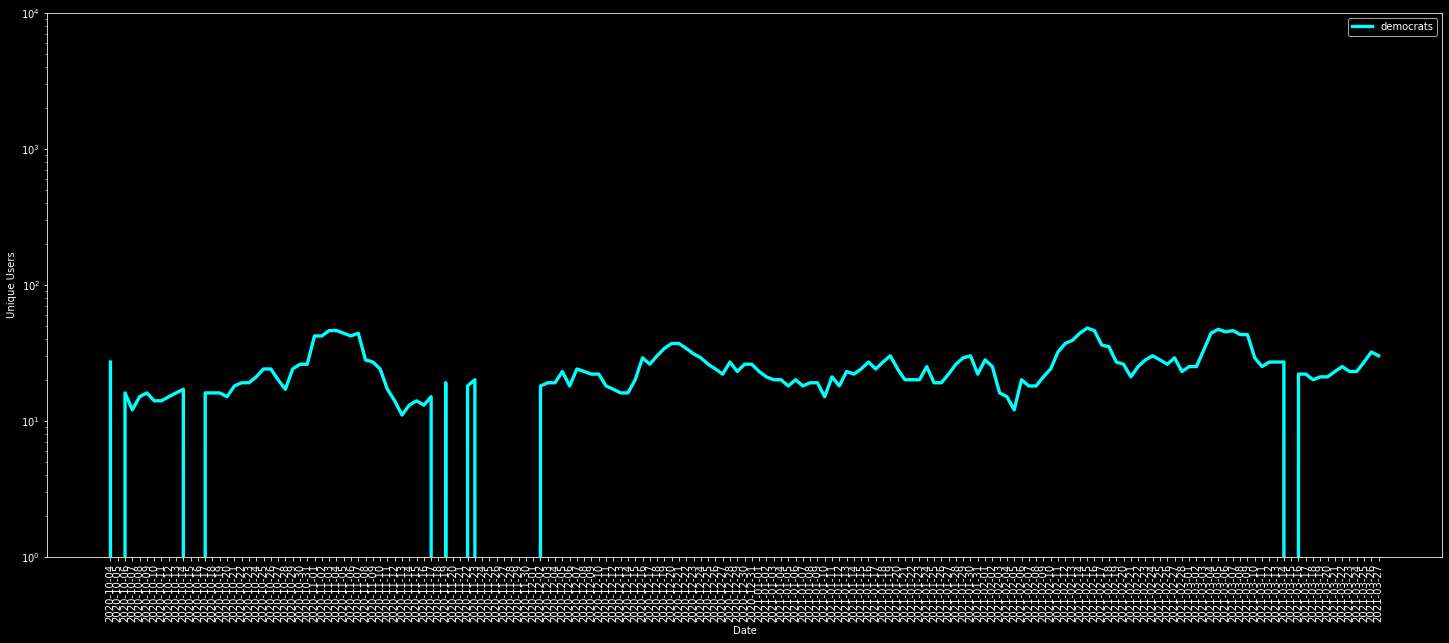

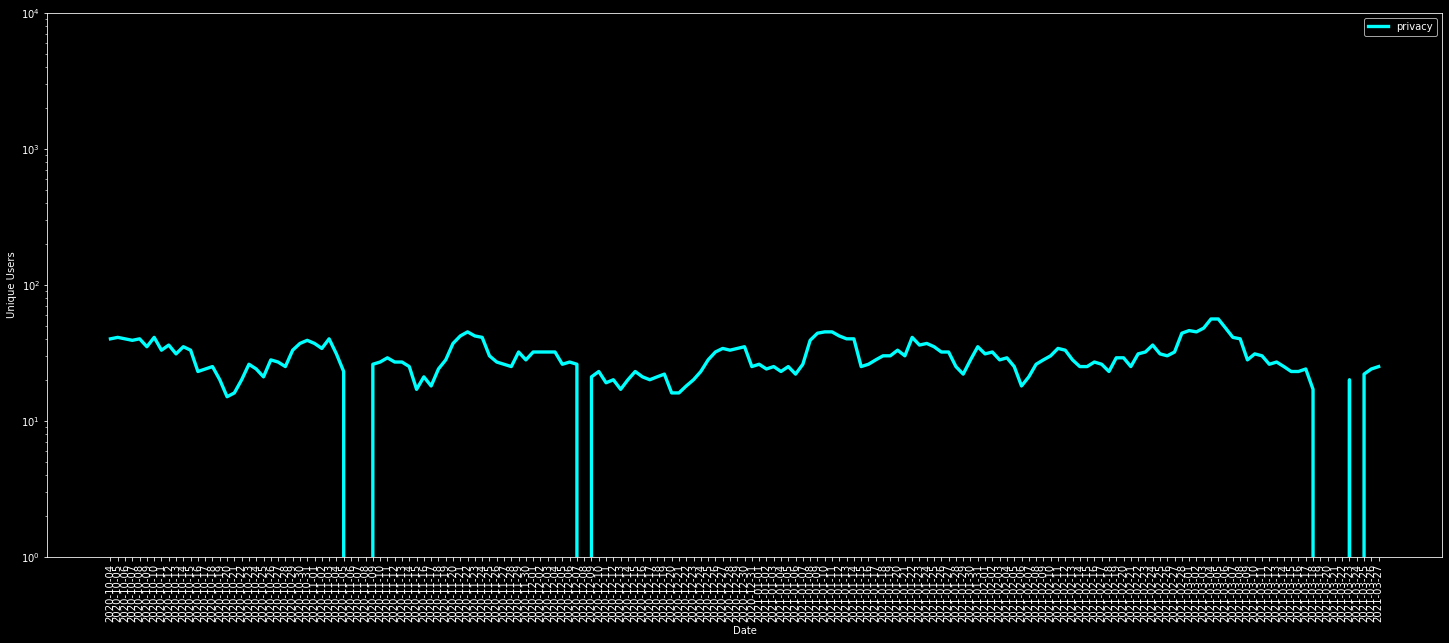

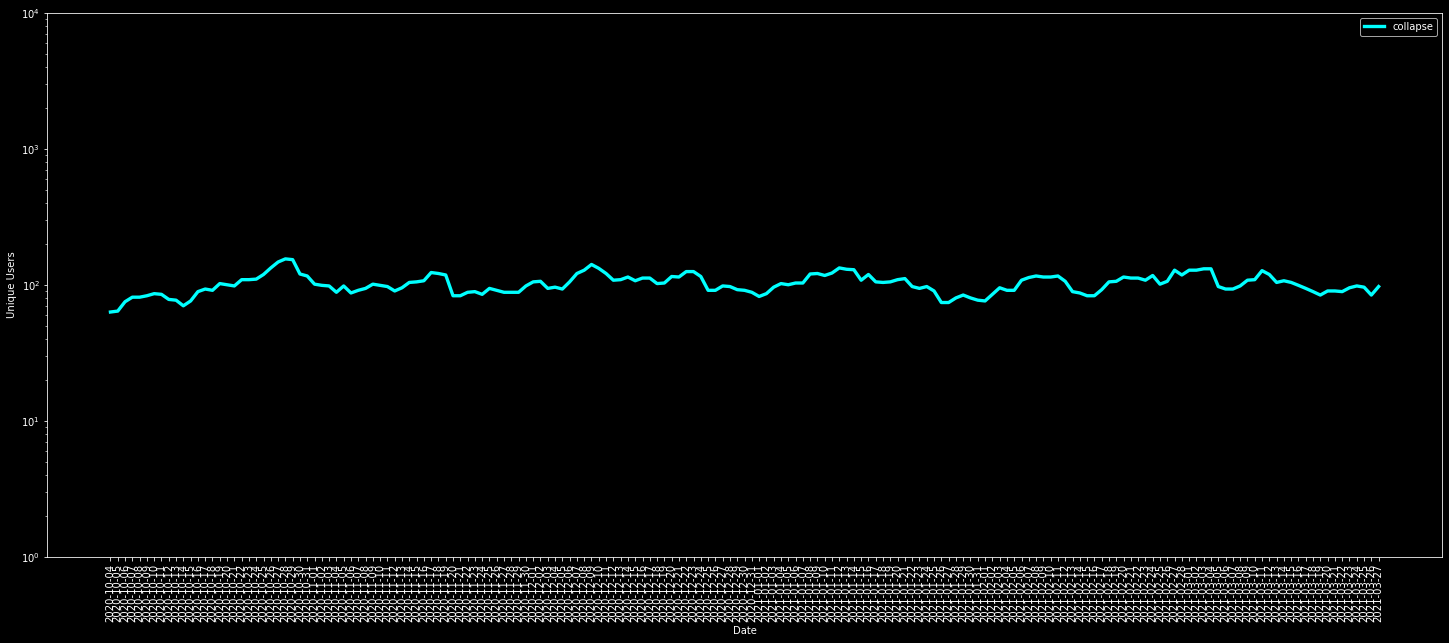

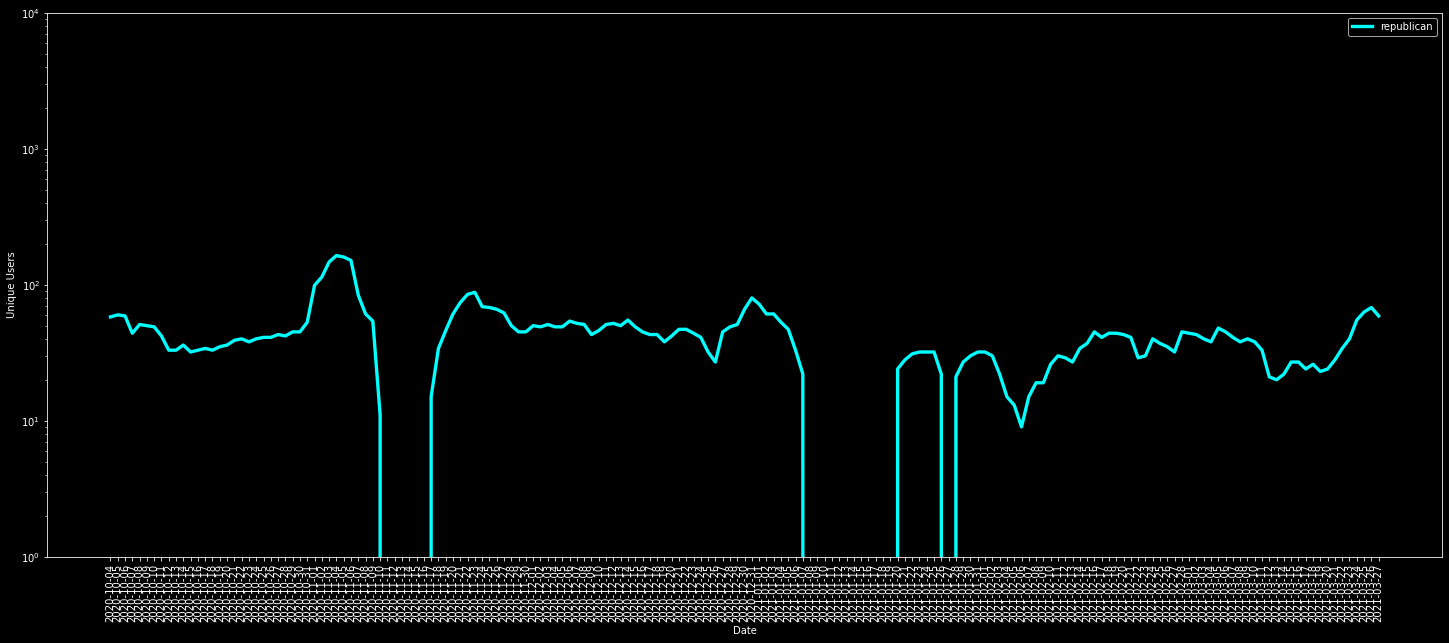

In [21]:
for sub in size_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(size_data.index, size_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Users')
    plt.ylim(1,10000)  
    plt.yscale('log')
    plt.legend()

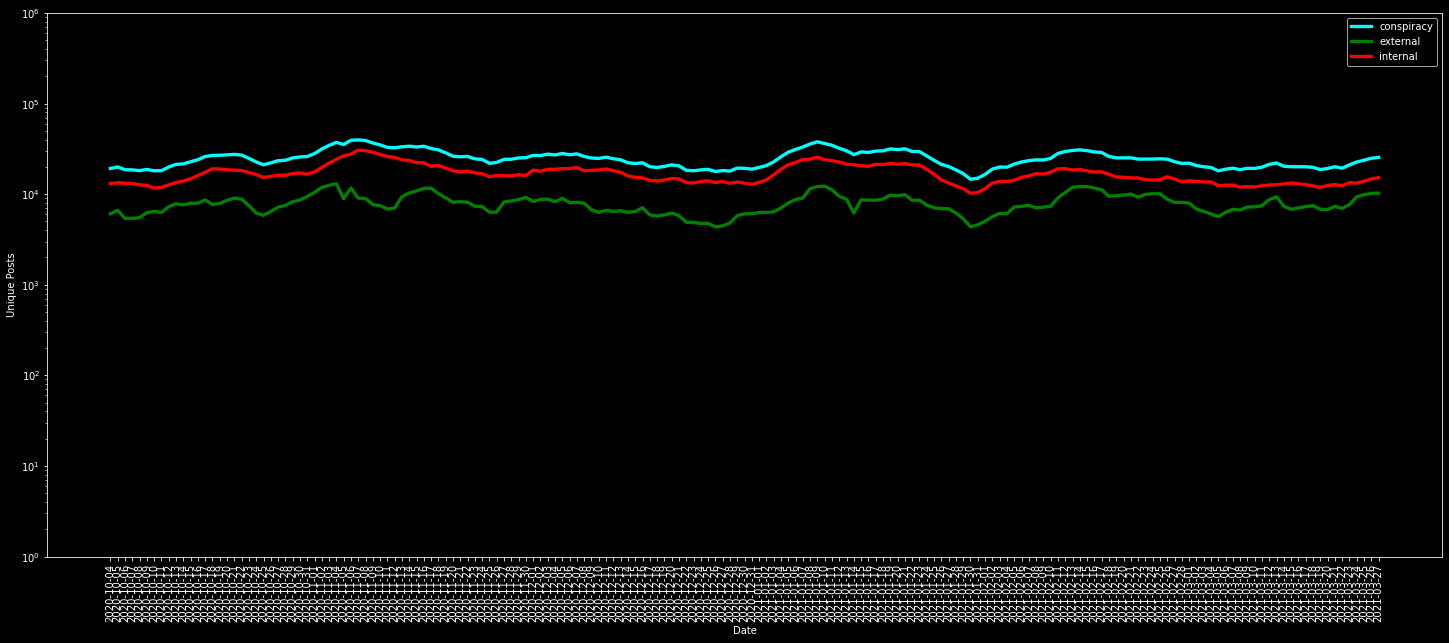

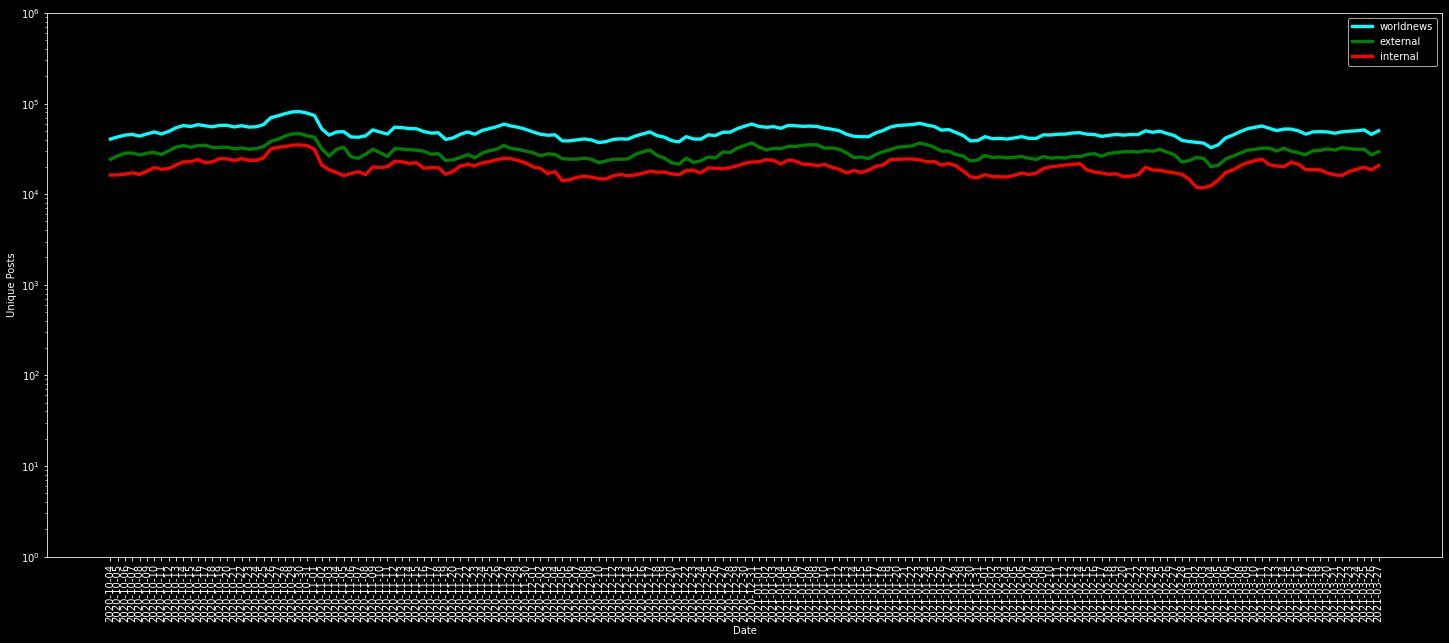

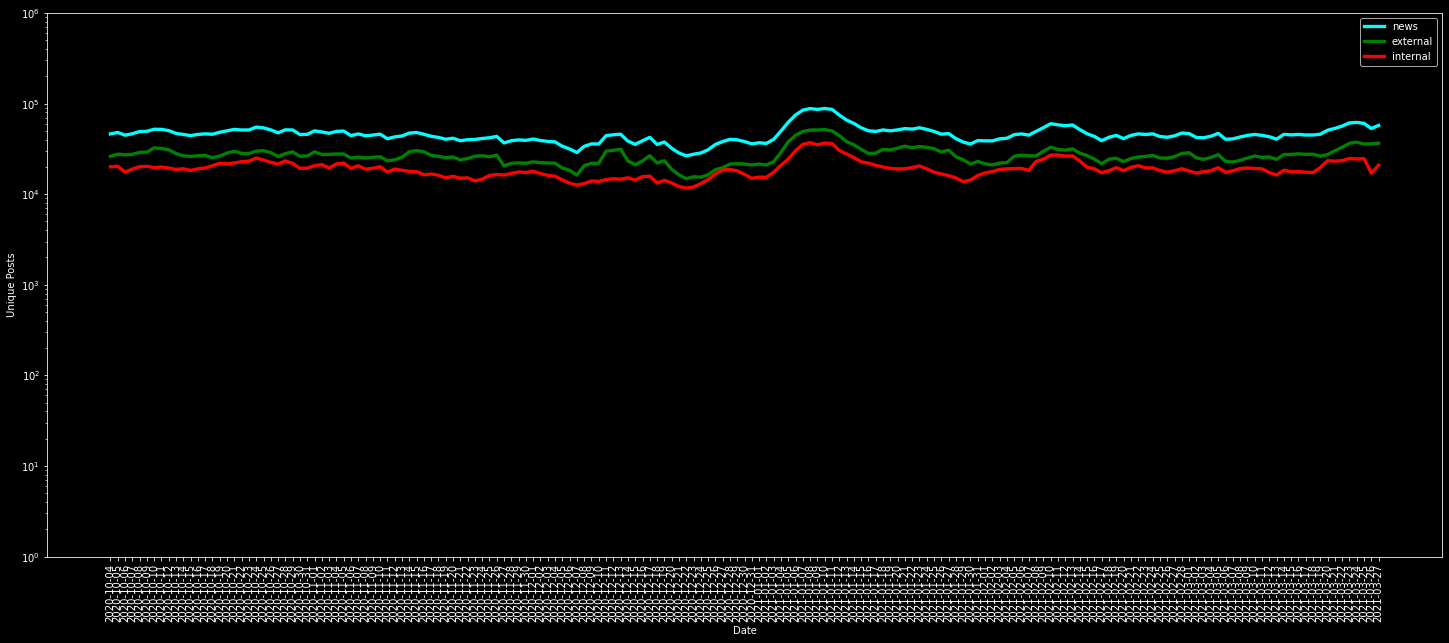

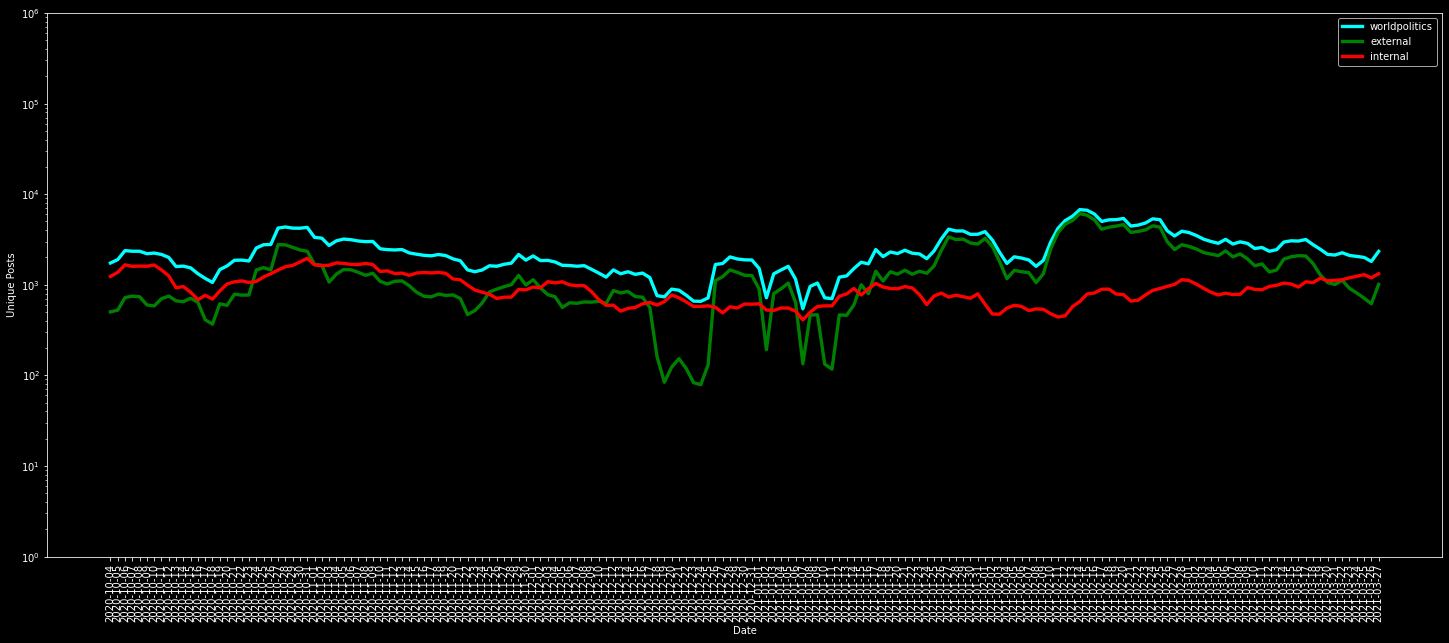

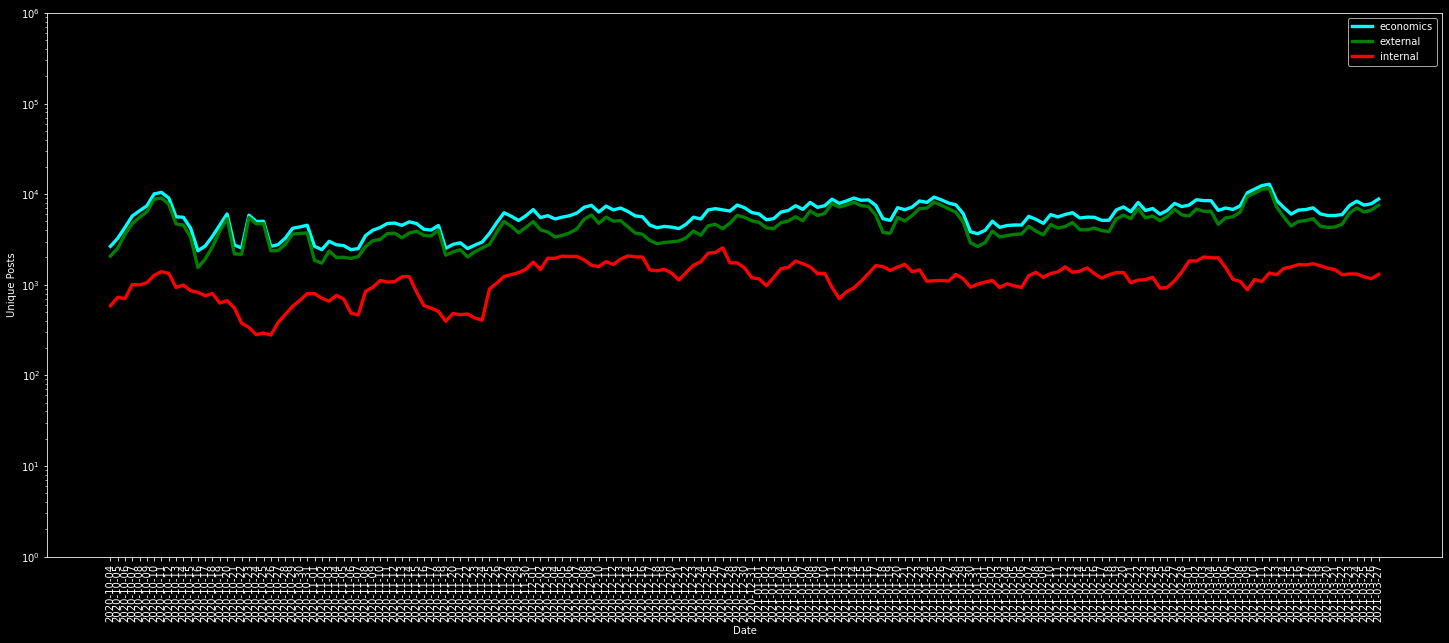

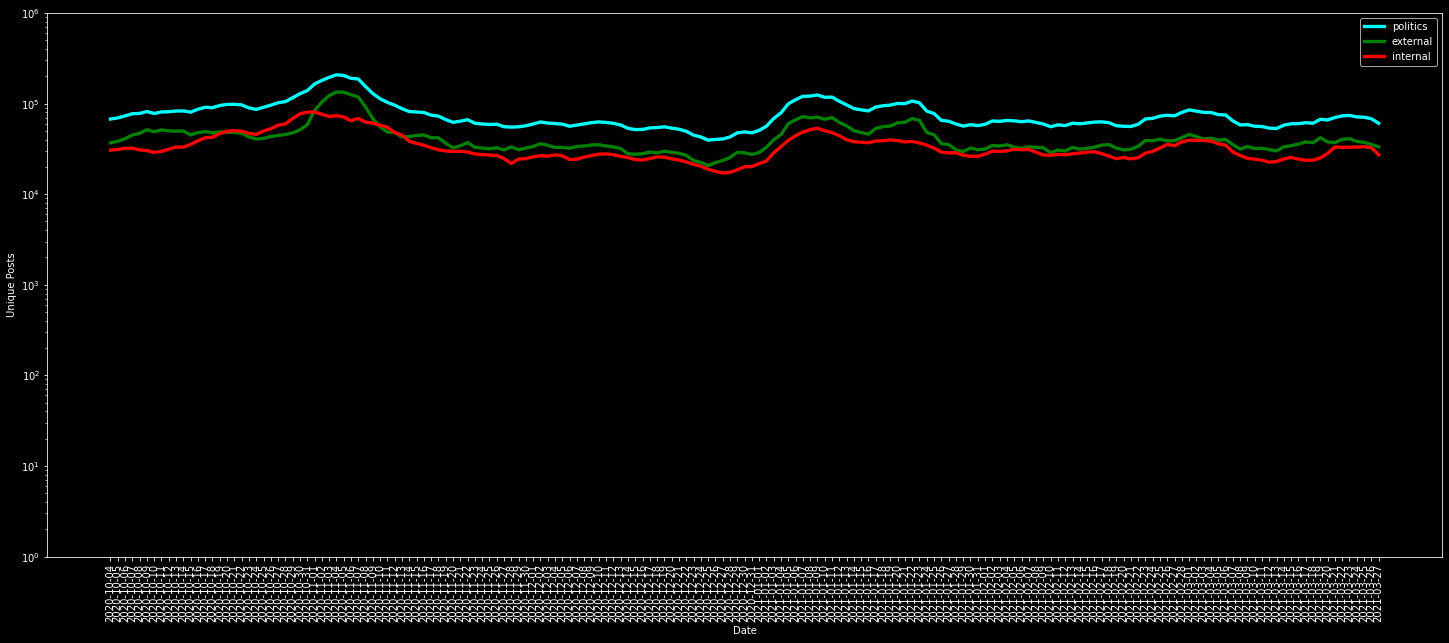

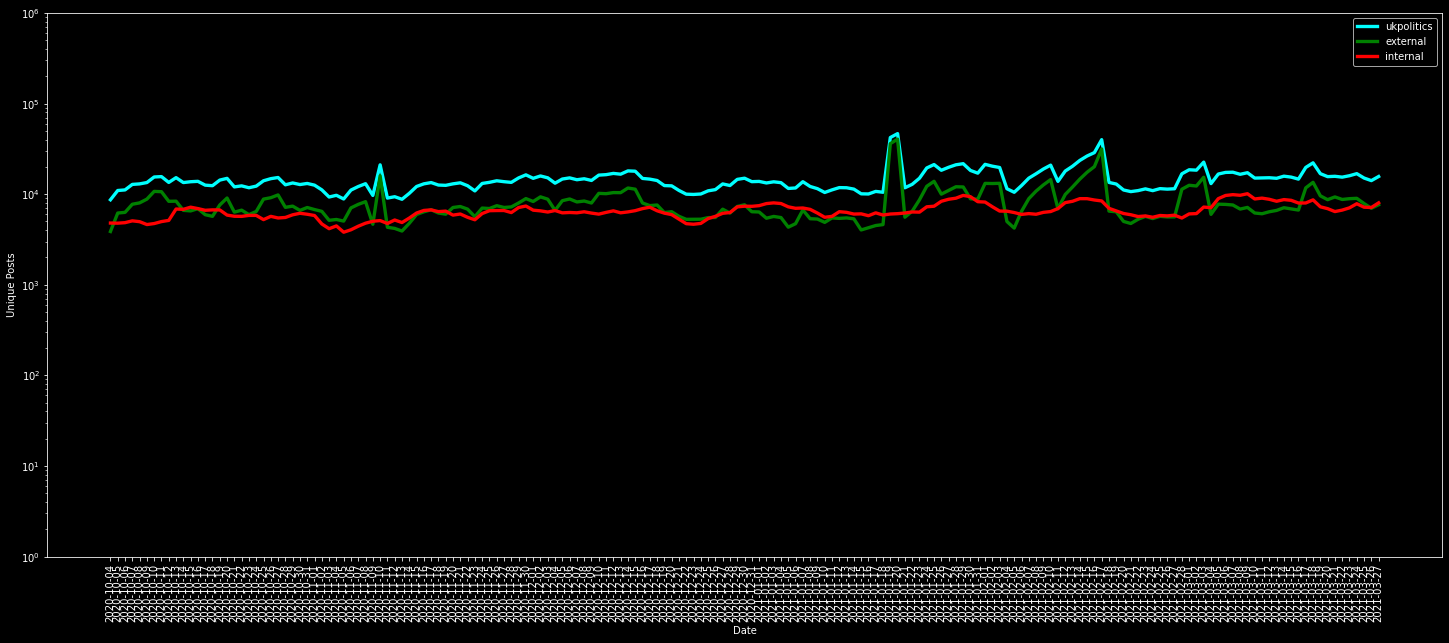

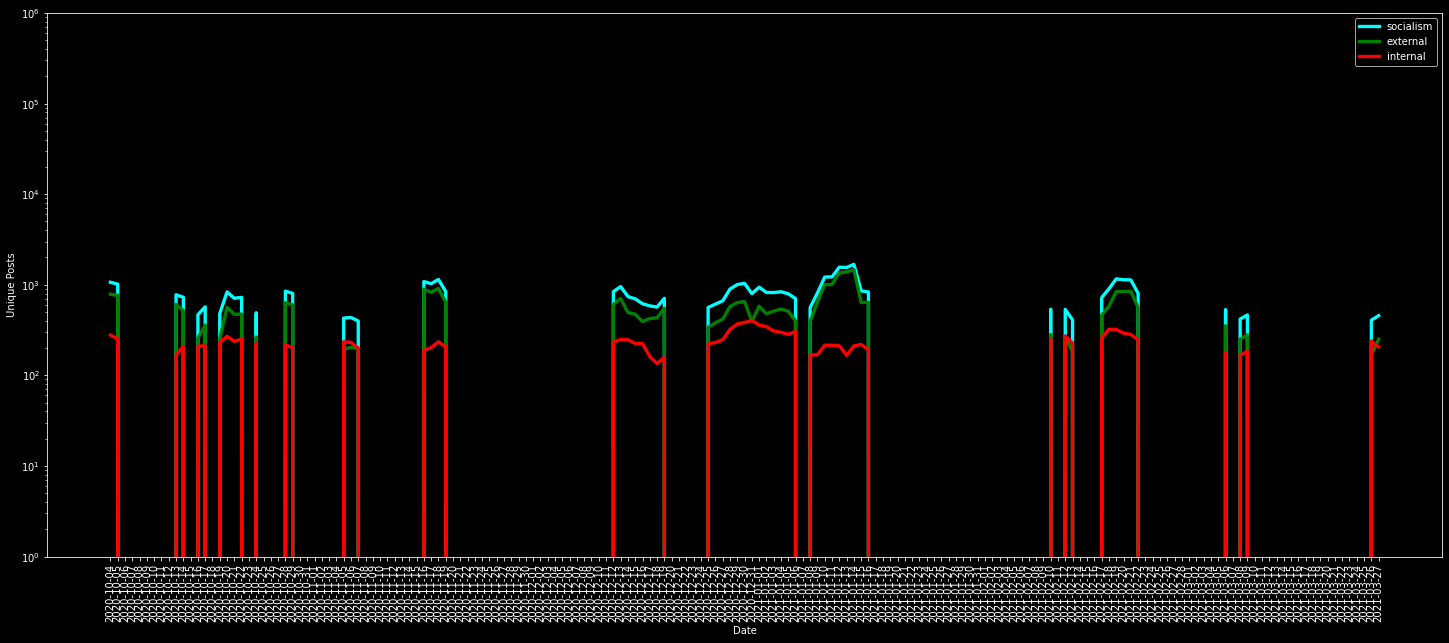

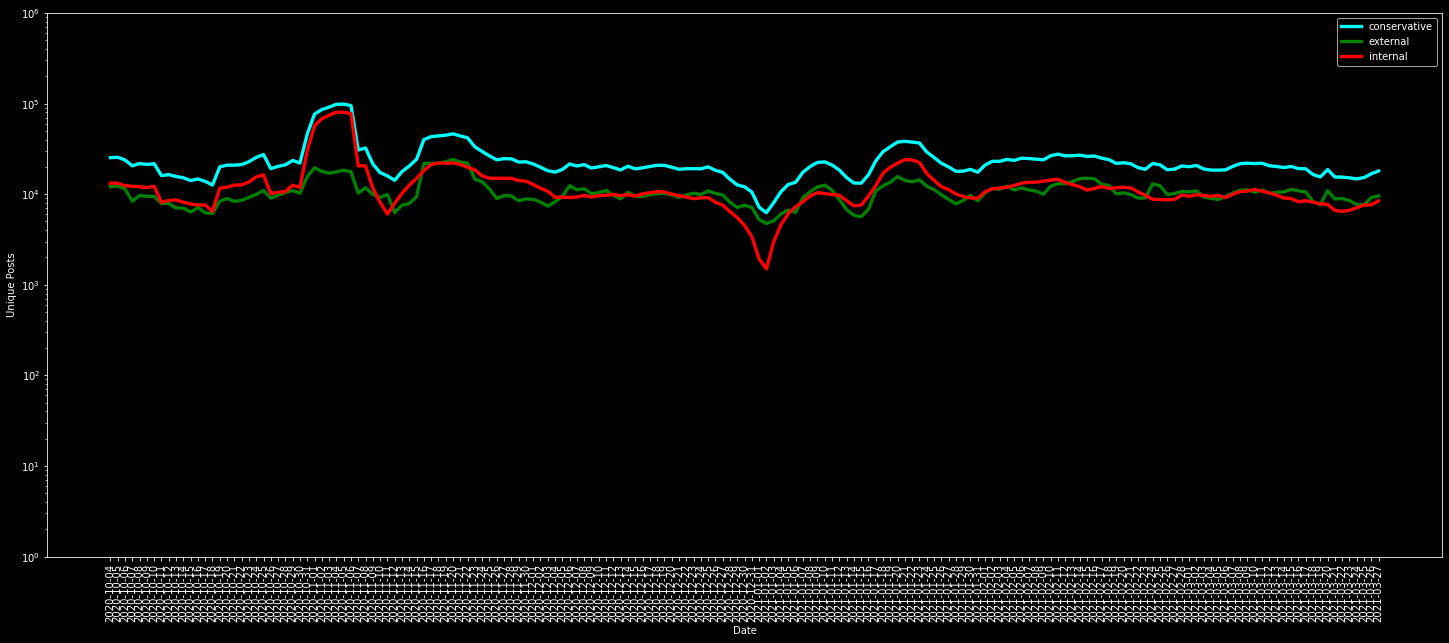

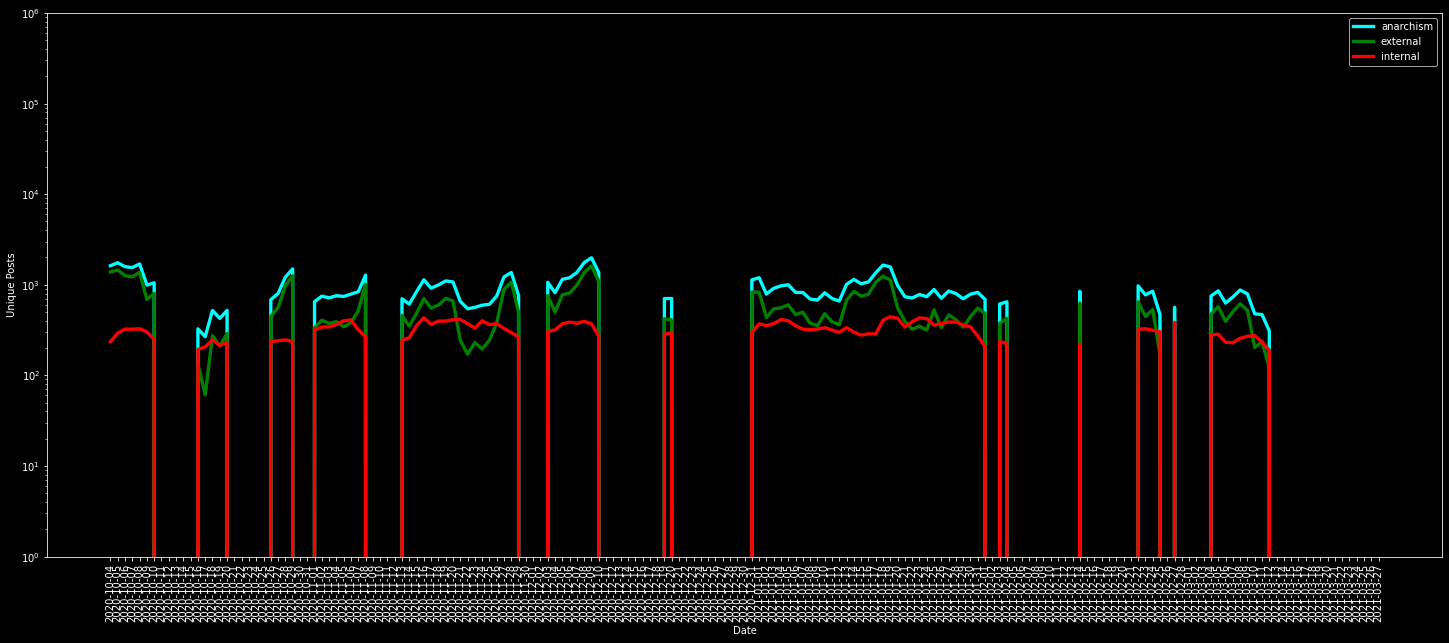

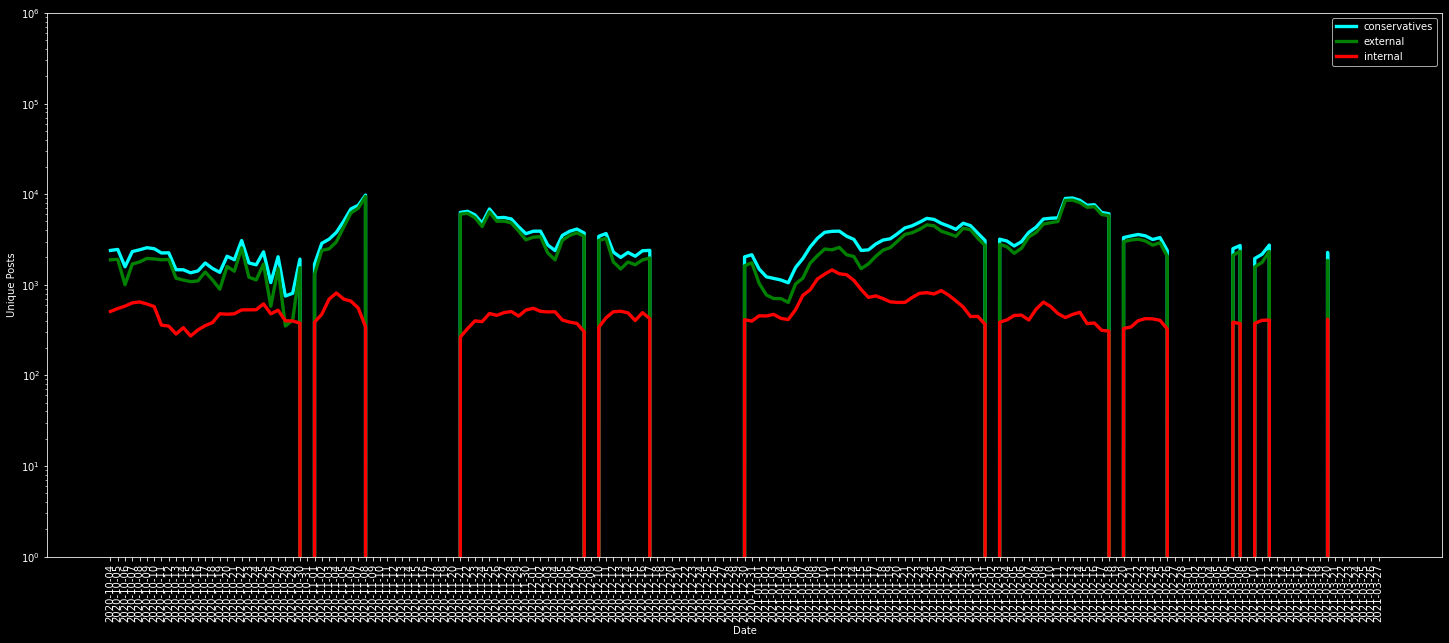

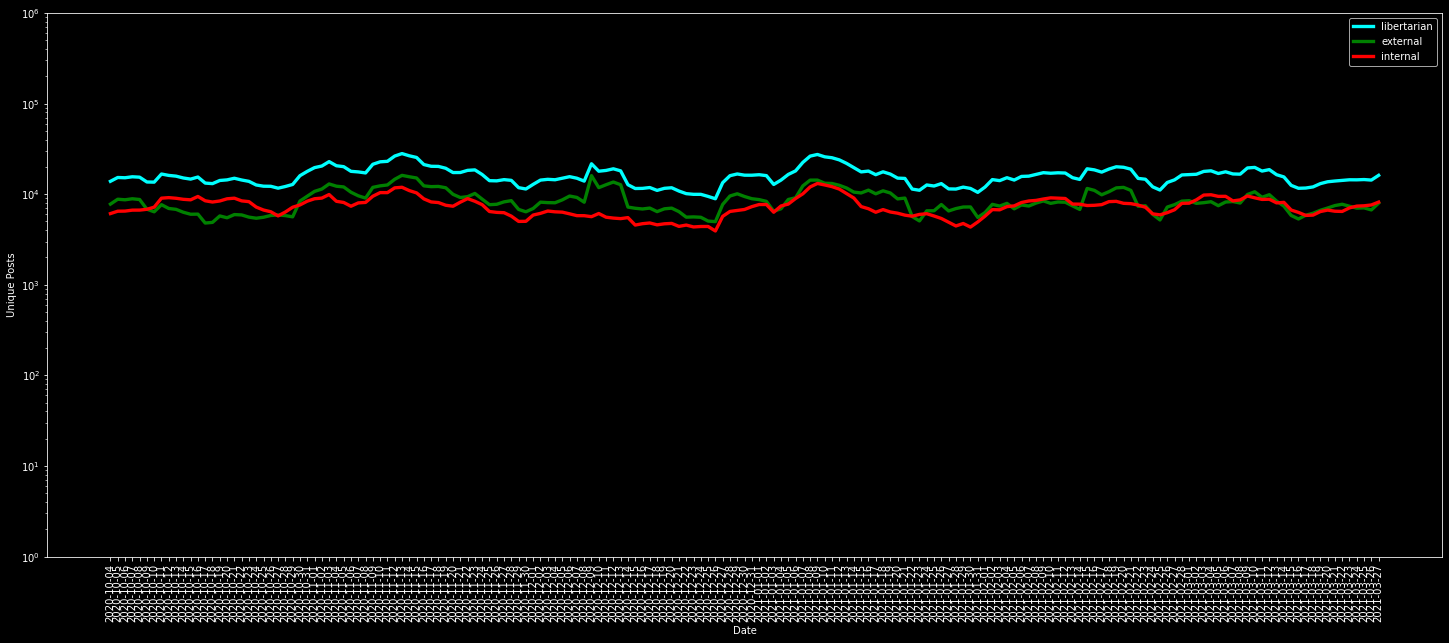

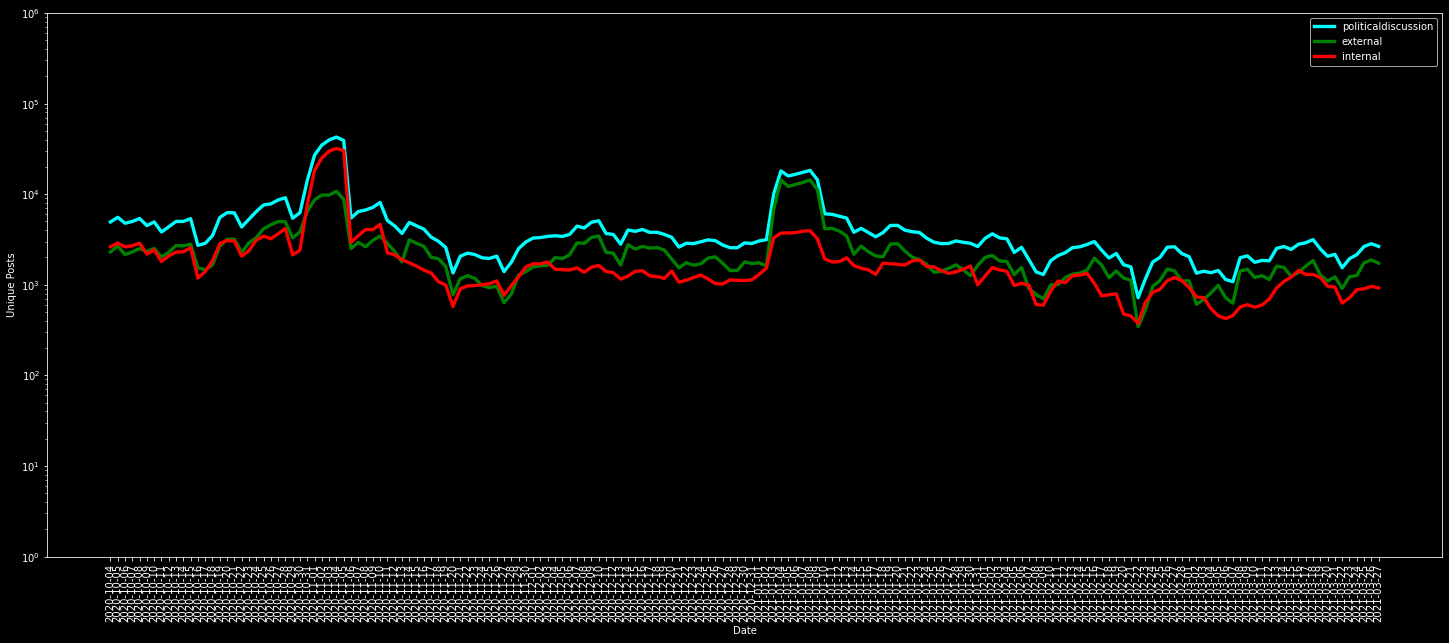

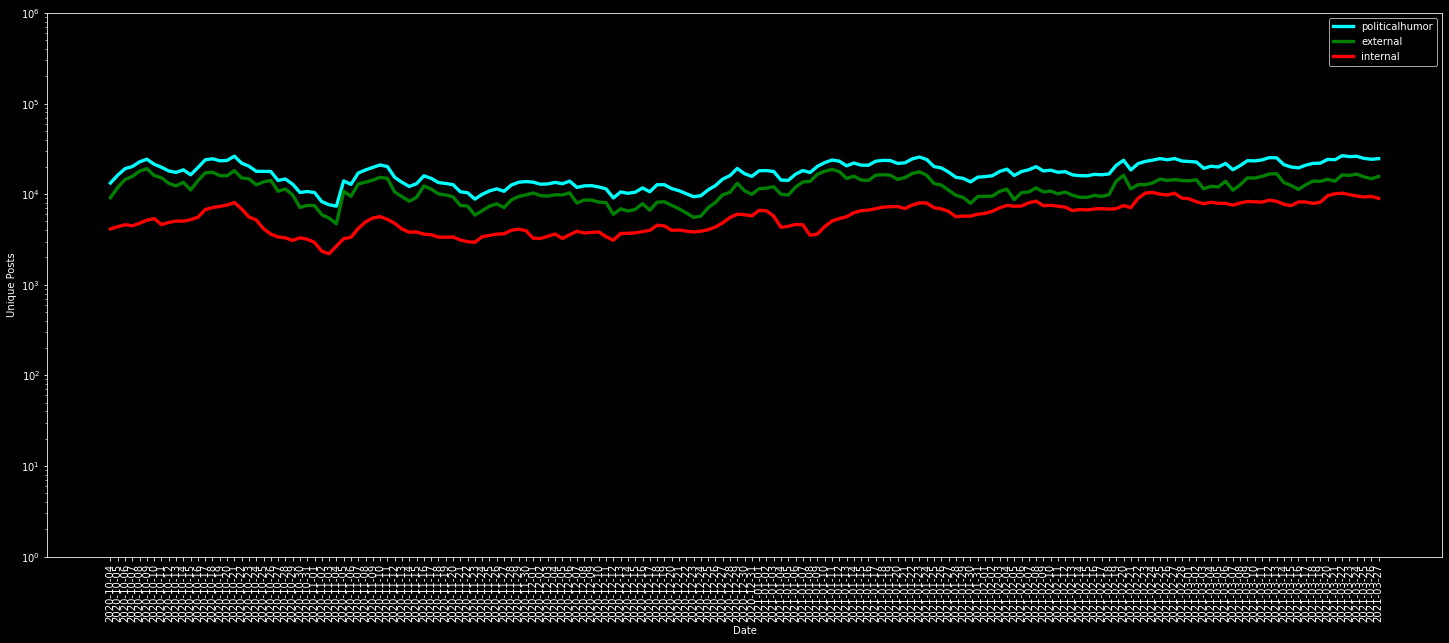

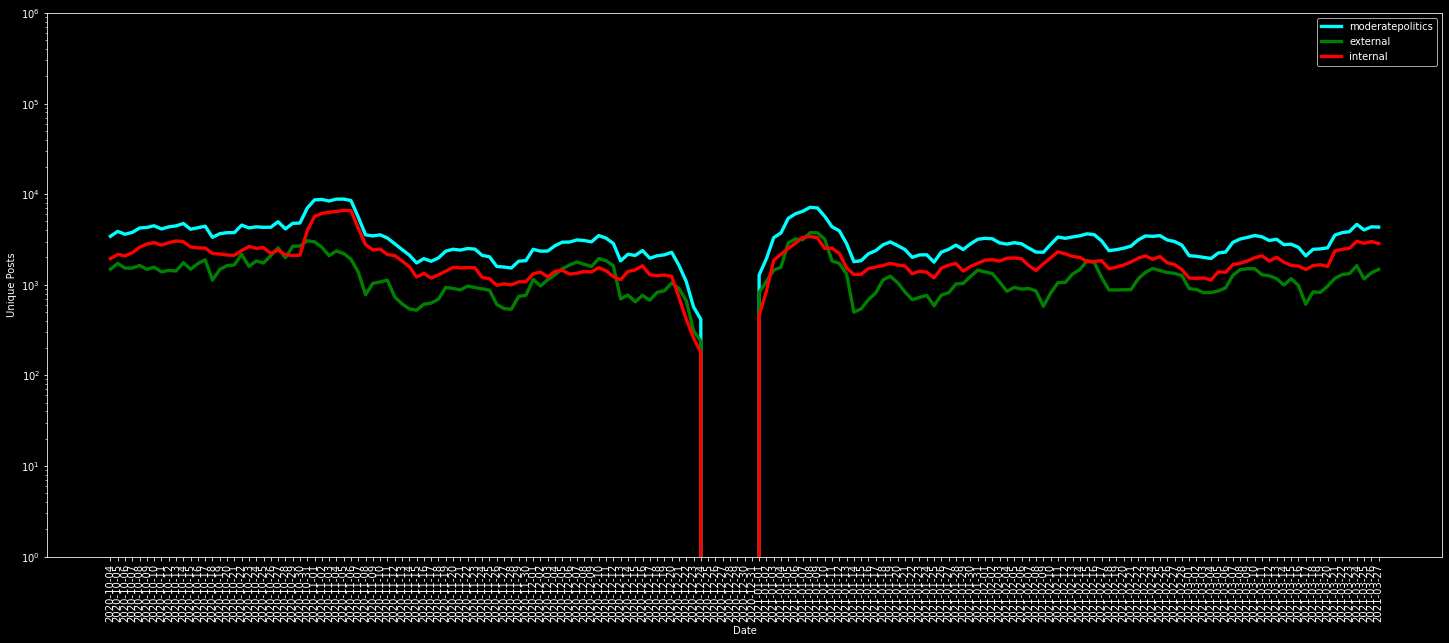

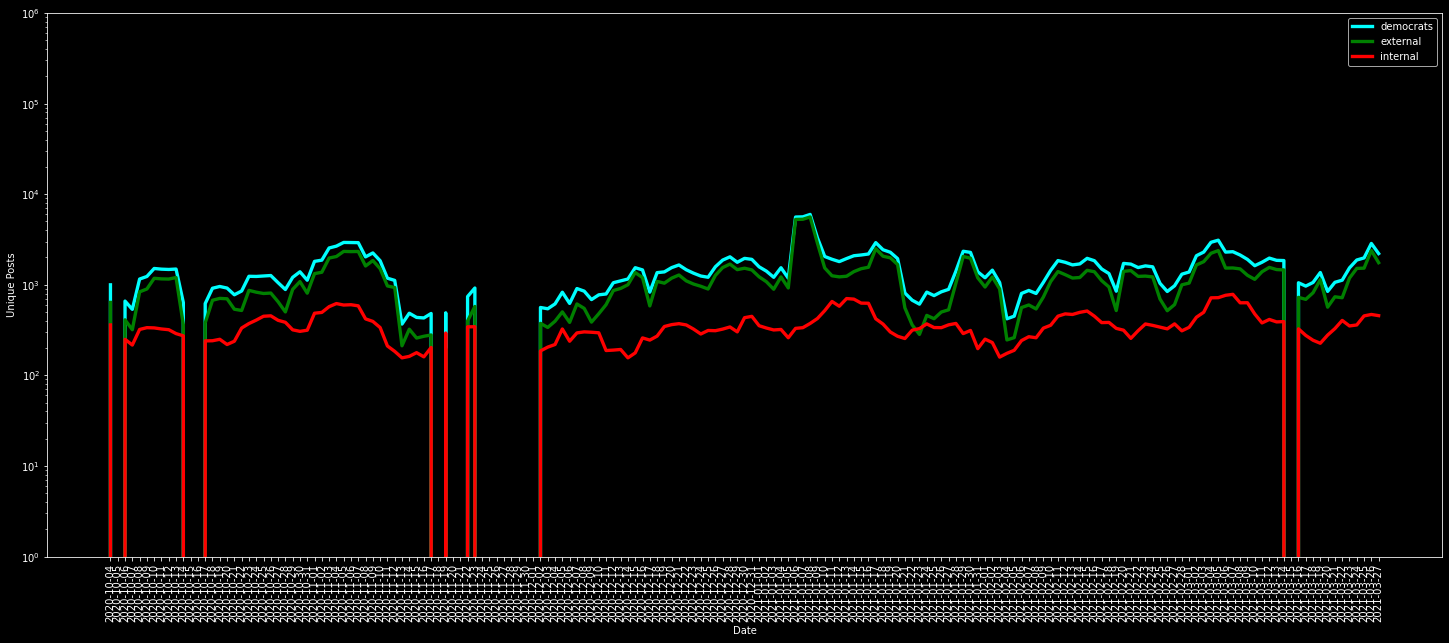

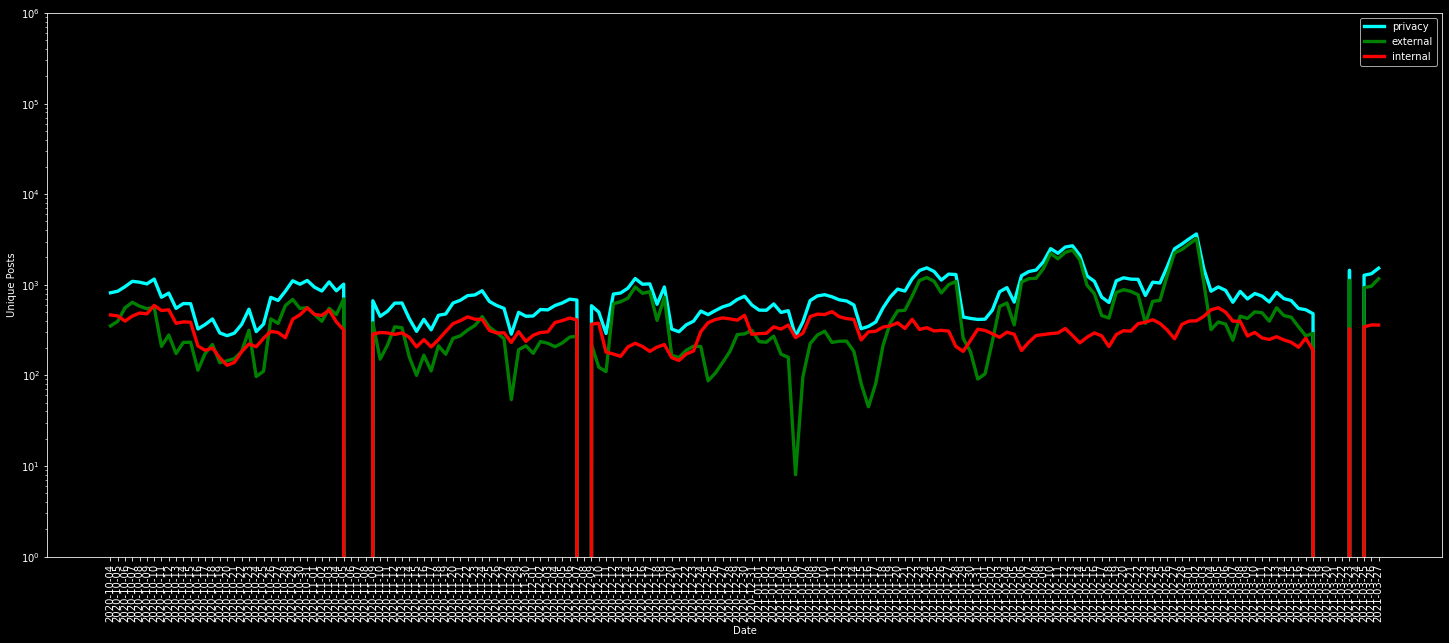

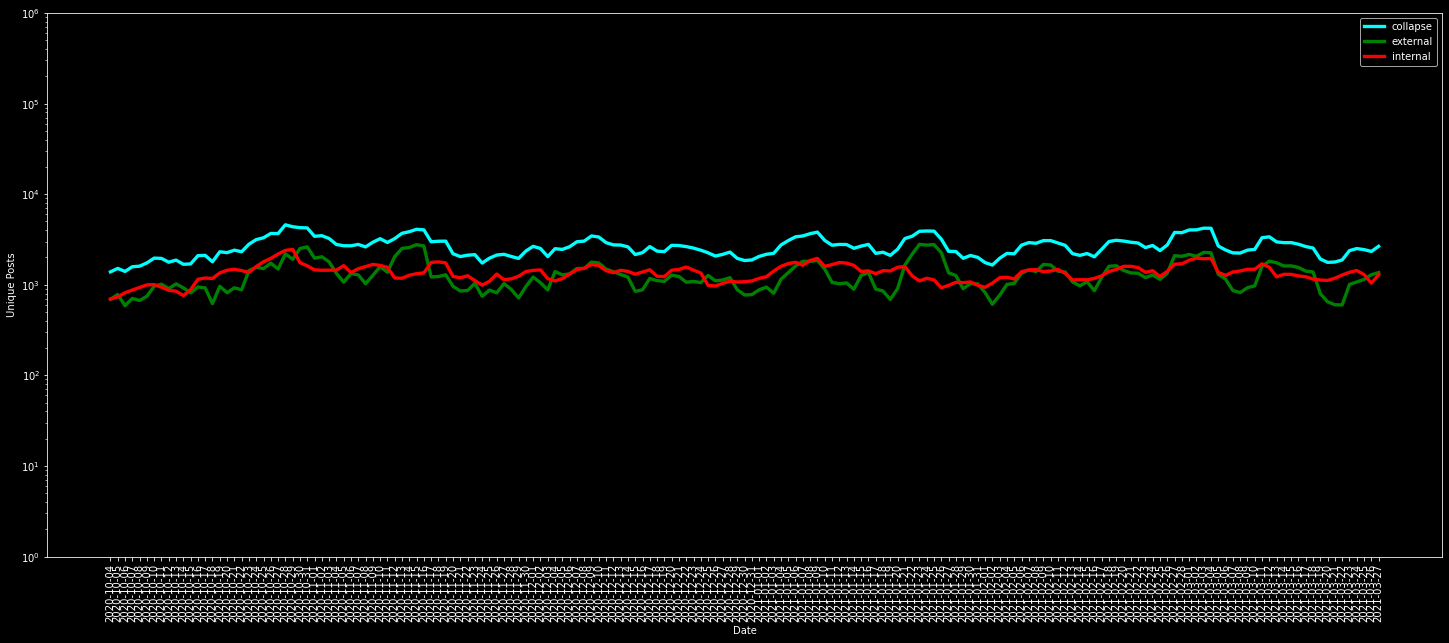

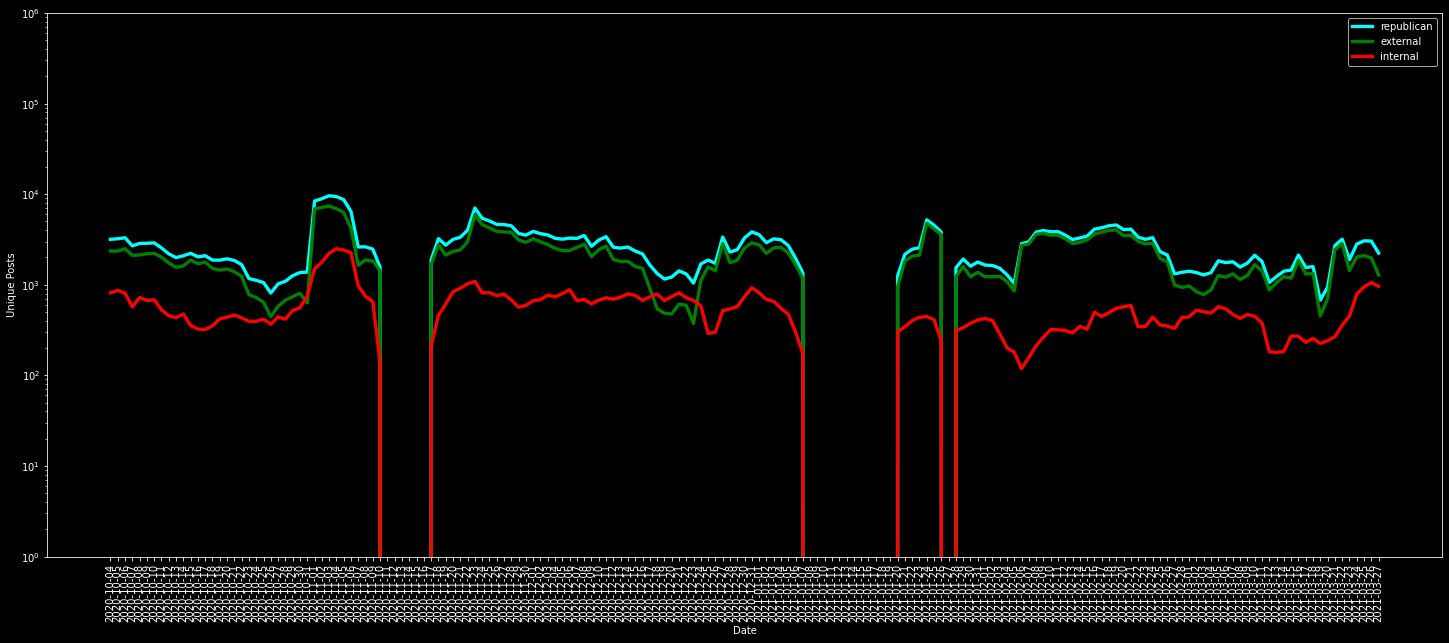

In [22]:
for sub in post_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(post_data.index, e_data[subbert][sub] + i_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.plot(e_data.index, e_data[subbert][sub], lw=3.333, c='green', label='external')
    plt.plot(i_data.index, i_data[subbert][sub], lw=3.333, c='red', label='internal')
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Posts')
    plt.ylim(1,1000000)
    plt.yscale('log')
    plt.legend()